# HCC - Case Study

In the bustling world of healthcare, efficient and effective communication between patients and healthcare providers is paramount. The Hospital System's Call Center (HCC) plays a crucial role in this regard, as it serves as the primary hub for handling inbound calls and managing telephonic interactions with patients. These interactions encompass a wide range of issues, from scheduling appointments to resolving queries related to patient care across various outpatient clinics.

In the following analysis, we will embark on a journey through this dataset to unearth insights and address crucial questions. Our goals are to conduct exploratory data analysis to summarize HCC's current state, identify key questions that the HCC manager can pose, define a model for productivity, and create a user-friendly dashboard to empower business leaders to make informed decisions based on this invaluable data resource. This multifaceted approach will not only enhance the efficiency of HCC operations but also elevate the quality of patient care provided by the Hospital System.

<a name="table-of-contents"></a>
## Table of Contents

- [1. Data Prepocessing](#section1)
- [2. EDA](#section2)
  - [2a. Overall](#section2a)
  - [2b. By team](#section2b)
  - [2c. By agent](#section2c)
  - [2d. Staffing Plan](#section2d)
- [3. Productivity Model](#section3)
  - [3a. By team](#section3a)
  - [3b. By agent](#section3b)
- [4. Productivity Dashboard](#section4)

<a name="section1"></a>
## 1 - Data Prepocessing

- Load dataset 
- Merging
- Check data info

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/var/folders/x8/vmspvpd557j0gjkqkwzhf08m0000gn/T/ipykernel_31931/1656482956.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/x8/vmspvpd557j0gjkqkwzhf08m0000gn/T/ipykernel_31931/1656482956.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# Load the dataset
sheet1 = pd.read_excel("Case Study Data.xlsx", sheet_name="Total logged-in time")
sheet2 = pd.read_excel("Case Study Data.xlsx", sheet_name="Not_Ready_Time")
sheet3 = pd.read_excel("Case Study Data.xlsx", sheet_name="Handled_Calls&Handle_Time")
sheet4 = pd.read_excel("Case Study Data.xlsx", sheet_name="Agent Team Lookup")

In [3]:
# Check first 5 rows to see the dataset is loaded correctly
sheet1.head()

Agent ID Interval Start Time   Interval End Time Total Logged In Time  \
0  Agent 1 2022-08-01 08:00:00 2022-08-01 08:30:00             00:27:02   
1  Agent 1 2022-08-01 08:30:00 2022-08-01 09:00:00             00:30:00   
2  Agent 1 2022-08-01 09:00:00 2022-08-01 09:30:00             00:30:00   
3  Agent 1 2022-08-01 09:30:00 2022-08-01 10:00:00             00:30:00   
4  Agent 1 2022-08-01 10:00:00 2022-08-01 10:30:00             00:30:00   

  Not Ready Time Ready Time Reserved Time Talk Time Next Call Prep Time  
0       00:03:26   00:00:07      00:00:22  00:21:51            00:01:16  
1       00:01:33   00:01:52      00:00:33  00:24:29            00:01:33  
2       00:04:16   00:00:00      00:00:37  00:23:01            00:02:06  
3       00:06:14   00:00:00      00:00:15  00:22:23            00:01:08  
4       00:01:49   00:00:00      00:00:15  00:26:57            00:00:59

In [4]:
# Check first 5 rows to see the dataset is loaded correctly
sheet2.head()

Agent ID Interval Start Time   Interval End Time Total Logged-in  \
0  Agent 1 2022-08-01 08:00:00 2022-08-01 08:30:00        00:27:02   
1  Agent 1 2022-08-01 08:30:00 2022-08-01 09:00:00        00:30:00   
2  Agent 1 2022-08-01 09:00:00 2022-08-01 09:30:00        00:30:00   
3  Agent 1 2022-08-01 09:30:00 2022-08-01 10:00:00        00:30:00   
4  Agent 1 2022-08-01 10:00:00 2022-08-01 10:30:00        00:30:00   

  Total Not Ready     Break     Lunch Team Support   Meeting After Call Work  \
0        00:03:26  00:00:00  00:00:00     00:00:00  00:00:00        00:03:23   
1        00:01:33  00:00:00  00:00:00     00:00:00  00:00:00        00:01:33   
2        00:04:16  00:00:01  00:00:00     00:00:00  00:00:00        00:04:15   
3        00:06:14  00:06:14  00:00:00     00:00:00  00:00:00        00:00:00   
4        00:01:49  00:00:00  00:00:00     00:00:00  00:00:00        00:01:49   

  Special Projects  Training System Issues     Other  
0         00:00:00  00:00:00      00:00:00  00:00:03  
1         00:00:00  00:00:00      00:00:00  00:00:00  
2         00:00:00  00:00:00      00:00:00  00:00:00  
3         00:00:00  00:00:00      00:00:00  00:00:00  
4         00:00:00  00:00:00      00:00:00  00:00:00

In [5]:
# Check first 5 rows to see the dataset is loaded correctly
sheet3.head()

Agent ID       Date  Number of Calls Handled Average Handle Time
0  Agent 1 2022-08-01                       94            00:04:40
1  Agent 1 2022-08-02                       80            00:04:42
2  Agent 1 2022-08-03                       81            00:04:34
3  Agent 1 2022-08-04                       73            00:05:12
4  Agent 1 2022-08-05                       75            00:04:51

In [6]:
# Check first 5 rows to see the dataset is loaded correctly
sheet4.head()

Agent ID Agent Team
0  Agent 1     team_1
1  Agent 2     team_3
2  Agent 3     team_3
3  Agent 4     team_4
4  Agent 5     team_4

Since sheet 1 and sheet 2 and sheet 4 have the common column 'Agent ID', 'Interval Start Time', 'Interval End Time', we will merge these two sheets. Sheet 3 will be left as is for further analysis (if we merge, the information will be duplicated).

In [7]:
# Merge sheet1 and sheet2 on 'Agent ID', 'Interval Start Time', and 'Interval End Time'
hcc_df = pd.merge(sheet1, sheet2, on=['Agent ID', 'Interval Start Time', 'Interval End Time'])
hcc_df = pd.merge(hcc_df, sheet4, on=['Agent ID'])

In [8]:
hcc_df.head()

Agent ID Interval Start Time   Interval End Time Total Logged In Time  \
0  Agent 1 2022-08-01 08:00:00 2022-08-01 08:30:00             00:27:02   
1  Agent 1 2022-08-01 08:30:00 2022-08-01 09:00:00             00:30:00   
2  Agent 1 2022-08-01 09:00:00 2022-08-01 09:30:00             00:30:00   
3  Agent 1 2022-08-01 09:30:00 2022-08-01 10:00:00             00:30:00   
4  Agent 1 2022-08-01 10:00:00 2022-08-01 10:30:00             00:30:00   

  Not Ready Time Ready Time Reserved Time Talk Time Next Call Prep Time  \
0       00:03:26   00:00:07      00:00:22  00:21:51            00:01:16   
1       00:01:33   00:01:52      00:00:33  00:24:29            00:01:33   
2       00:04:16   00:00:00      00:00:37  00:23:01            00:02:06   
3       00:06:14   00:00:00      00:00:15  00:22:23            00:01:08   
4       00:01:49   00:00:00      00:00:15  00:26:57            00:00:59   

  Total Logged-in  ...     Break     Lunch Team Support   Meeting  \
0        00:27:02  ...  00:00:00  00:00:00     00:00:00  00:00:00   
1        00:30:00  ...  00:00:00  00:00:00     00:00:00  00:00:00   
2        00:30:00  ...  00:00:01  00:00:00     00:00:00  00:00:00   
3        00:30:00  ...  00:06:14  00:00:00     00:00:00  00:00:00   
4        00:30:00  ...  00:00:00  00:00:00     00:00:00  00:00:00   

  After Call Work Special Projects  Training System Issues     Other  \
0        00:03:23         00:00:00  00:00:00      00:00:00  00:00:03   
1        00:01:33         00:00:00  00:00:00      00:00:00  00:00:00   
2        00:04:15         00:00:00  00:00:00      00:00:00  00:00:00   
3        00:00:00         00:00:00  00:00:00      00:00:00  00:00:00   
4        00:01:49         00:00:00  00:00:00      00:00:00  00:00:00   

  Agent Team  
0     team_1  
1     team_1  
2     team_1  
3     team_1  
4     team_1  

[5 rows x 21 columns]

In [9]:
# Split the "Interval Start Time" column into "Date" column (in case we need analysis in daily basis)
hcc_df['Date'] = hcc_df['Interval Start Time'].dt.date
hcc_df['Date'] = pd.to_datetime(hcc_df['Date'])

# Create a list of column names in the desired order
desired_order = ['Agent ID','Agent Team','Date'] + [col for col in hcc_df.columns if col not in ['Agent ID','Agent Team','Date']]

# Reorder the columns based on the desired order, drop duplicated columns
hcc_df = hcc_df[desired_order]
hcc_df = hcc_df.drop(['Total Not Ready','Total Logged-in'], axis =1)

hcc_df.head()

Agent ID Agent Team       Date Interval Start Time   Interval End Time  \
0  Agent 1     team_1 2022-08-01 2022-08-01 08:00:00 2022-08-01 08:30:00   
1  Agent 1     team_1 2022-08-01 2022-08-01 08:30:00 2022-08-01 09:00:00   
2  Agent 1     team_1 2022-08-01 2022-08-01 09:00:00 2022-08-01 09:30:00   
3  Agent 1     team_1 2022-08-01 2022-08-01 09:30:00 2022-08-01 10:00:00   
4  Agent 1     team_1 2022-08-01 2022-08-01 10:00:00 2022-08-01 10:30:00   

  Total Logged In Time Not Ready Time Ready Time Reserved Time Talk Time  \
0             00:27:02       00:03:26   00:00:07      00:00:22  00:21:51   
1             00:30:00       00:01:33   00:01:52      00:00:33  00:24:29   
2             00:30:00       00:04:16   00:00:00      00:00:37  00:23:01   
3             00:30:00       00:06:14   00:00:00      00:00:15  00:22:23   
4             00:30:00       00:01:49   00:00:00      00:00:15  00:26:57   

  Next Call Prep Time     Break     Lunch Team Support   Meeting  \
0            00:01:16  00:00:00  00:00:00     00:00:00  00:00:00   
1            00:01:33  00:00:00  00:00:00     00:00:00  00:00:00   
2            00:02:06  00:00:01  00:00:00     00:00:00  00:00:00   
3            00:01:08  00:06:14  00:00:00     00:00:00  00:00:00   
4            00:00:59  00:00:00  00:00:00     00:00:00  00:00:00   

  After Call Work Special Projects  Training System Issues     Other  
0        00:03:23         00:00:00  00:00:00      00:00:00  00:00:03  
1        00:01:33         00:00:00  00:00:00      00:00:00  00:00:00  
2        00:04:15         00:00:00  00:00:00      00:00:00  00:00:00  
3        00:00:00         00:00:00  00:00:00      00:00:00  00:00:00  
4        00:01:49         00:00:00  00:00:00      00:00:00  00:00:00

In [10]:
hcc_df.shape

(24912, 20)

In [11]:
hcc_df.isnull().sum()

Agent ID                0
Agent Team              0
Date                    0
Interval Start Time     0
Interval End Time       0
Total Logged In Time    0
Not Ready Time          0
Ready Time              0
Reserved Time           0
Talk Time               0
Next Call Prep Time     0
Break                   0
Lunch                   0
Team Support            0
Meeting                 0
After Call Work         0
Special Projects        0
Training                0
System Issues           0
Other                   0
dtype: int64

In [12]:
hcc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24912 entries, 0 to 24911
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Agent ID              24912 non-null  object        
 1   Agent Team            24912 non-null  object        
 2   Date                  24912 non-null  datetime64[ns]
 3   Interval Start Time   24912 non-null  datetime64[ns]
 4   Interval End Time     24912 non-null  datetime64[ns]
 5   Total Logged In Time  24912 non-null  object        
 6   Not Ready Time        24912 non-null  object        
 7   Ready Time            24912 non-null  object        
 8   Reserved Time         24912 non-null  object        
 9   Talk Time             24912 non-null  object        
 10  Next Call Prep Time   24912 non-null  object        
 11  Break                 24912 non-null  object        
 12  Lunch                 24912 non-null  object        
 13  Team Support    

Re-format the time-related columns for more appropriate analysis. 
We will change from column **'Total Logged In Time'** to column **'Other'** as **timedelta64**.

In [13]:
# Specify the columns that contain time-related data
time_related_columns = hcc_df.columns[5:20]

# Convert the time-related columns to float as Days
for col in time_related_columns:
    #hcc_df[col] = pd.to_timedelta(hcc_df[col].astype(str)).dt.total_seconds() / (3600 * 24) 
    hcc_df[col] = pd.to_timedelta(hcc_df[col].astype(str))

In [14]:
hcc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24912 entries, 0 to 24911
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Agent ID              24912 non-null  object         
 1   Agent Team            24912 non-null  object         
 2   Date                  24912 non-null  datetime64[ns] 
 3   Interval Start Time   24912 non-null  datetime64[ns] 
 4   Interval End Time     24912 non-null  datetime64[ns] 
 5   Total Logged In Time  24912 non-null  timedelta64[ns]
 6   Not Ready Time        24912 non-null  timedelta64[ns]
 7   Ready Time            24912 non-null  timedelta64[ns]
 8   Reserved Time         24912 non-null  timedelta64[ns]
 9   Talk Time             24912 non-null  timedelta64[ns]
 10  Next Call Prep Time   24912 non-null  timedelta64[ns]
 11  Break                 24912 non-null  timedelta64[ns]
 12  Lunch                 24912 non-null  timedelta64[ns]
 13  T

In [15]:
hcc_df.head()

Agent ID Agent Team       Date Interval Start Time   Interval End Time  \
0  Agent 1     team_1 2022-08-01 2022-08-01 08:00:00 2022-08-01 08:30:00   
1  Agent 1     team_1 2022-08-01 2022-08-01 08:30:00 2022-08-01 09:00:00   
2  Agent 1     team_1 2022-08-01 2022-08-01 09:00:00 2022-08-01 09:30:00   
3  Agent 1     team_1 2022-08-01 2022-08-01 09:30:00 2022-08-01 10:00:00   
4  Agent 1     team_1 2022-08-01 2022-08-01 10:00:00 2022-08-01 10:30:00   

  Total Logged In Time  Not Ready Time      Ready Time   Reserved Time  \
0      0 days 00:27:02 0 days 00:03:26 0 days 00:00:07 0 days 00:00:22   
1      0 days 00:30:00 0 days 00:01:33 0 days 00:01:52 0 days 00:00:33   
2      0 days 00:30:00 0 days 00:04:16 0 days 00:00:00 0 days 00:00:37   
3      0 days 00:30:00 0 days 00:06:14 0 days 00:00:00 0 days 00:00:15   
4      0 days 00:30:00 0 days 00:01:49 0 days 00:00:00 0 days 00:00:15   

        Talk Time Next Call Prep Time           Break  Lunch Team Support  \
0 0 days 00:21:51     0 days 00:01:16 0 days 00:00:00 0 days       0 days   
1 0 days 00:24:29     0 days 00:01:33 0 days 00:00:00 0 days       0 days   
2 0 days 00:23:01     0 days 00:02:06 0 days 00:00:01 0 days       0 days   
3 0 days 00:22:23     0 days 00:01:08 0 days 00:06:14 0 days       0 days   
4 0 days 00:26:57     0 days 00:00:59 0 days 00:00:00 0 days       0 days   

  Meeting After Call Work Special Projects Training System Issues  \
0  0 days 0 days 00:03:23           0 days   0 days        0 days   
1  0 days 0 days 00:01:33           0 days   0 days        0 days   
2  0 days 0 days 00:04:15           0 days   0 days        0 days   
3  0 days 0 days 00:00:00           0 days   0 days        0 days   
4  0 days 0 days 00:01:49           0 days   0 days        0 days   

            Other  
0 0 days 00:00:03  
1 0 days 00:00:00  
2 0 days 00:00:00  
3 0 days 00:00:00  
4 0 days 00:00:00

[Jump to Table of Contents](#table-of-contents)

[Jump to Section 2: EDA](#section2)

[Jump to Section 3: Productivity Model](#section3)

[Jump to Section 4: Productivity Dashboard](#section4)

<a name="section2"></a>

## 2 - EDA: 

Conduct exploratory (descriptive) data analysis and summarize key findings pertaining to HCC’s current state.

  - [2a. Overall](#section2a)
  - [2b. By team](#section2b)
  - [2c. By Agent](#section2c)
  - [2d. Staffing Plan](#section2d)

<a name="section2a"></a>
### a) Overall time estimation for all the activities:

In [16]:
hcc_df.describe()

Total Logged In Time             Not Ready Time  \
count                      24912                      24912   
mean   0 days 00:22:47.069845857  0 days 00:03:37.874638728   
std    0 days 00:12:22.696562502  0 days 00:06:40.461289026   
min              0 days 00:00:00            0 days 00:00:00   
25%       0 days 00:21:51.750000            0 days 00:00:00   
50%              0 days 00:30:00            0 days 00:00:11   
75%              0 days 00:30:00            0 days 00:04:14   
max              0 days 00:30:00            0 days 00:30:00   

                      Ready Time              Reserved Time  \
count                      24912                      24912   
mean   0 days 00:02:14.546202633  0 days 00:00:17.288334938   
std    0 days 00:04:25.724780060  0 days 00:00:19.288031934   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:05            0 days 00:00:15   
75%       0 days 00:02:18.250000            0 days 00:00:27   
max              0 days 00:30:00            0 days 00:14:26   

                       Talk Time        Next Call Prep Time  \
count                      24912                      24912   
mean   0 days 00:15:30.948859987  0 days 00:01:06.411809569   
std    0 days 00:10:40.340246808  0 days 00:00:58.443825965   
min              0 days 00:00:00            0 days 00:00:00   
25%       0 days 00:01:49.750000            0 days 00:00:05   
50%              0 days 00:19:09            0 days 00:01:00   
75%              0 days 00:24:59            0 days 00:01:44   
max              0 days 00:30:00            0 days 00:08:38   

                           Break                      Lunch  \
count                      24912                      24912   
mean   0 days 00:00:39.447736030  0 days 00:01:00.675417469   
std    0 days 00:02:32.250826455  0 days 00:04:46.022551244   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:00            0 days 00:00:00   
75%              0 days 00:00:00            0 days 00:00:00   
max              0 days 00:30:00            0 days 00:30:00   

                    Team Support                    Meeting  \
count                      24912                      24912   
mean   0 days 00:00:00.636159280  0 days 00:00:06.517501605   
std    0 days 00:00:23.855751314  0 days 00:01:12.196593646   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:00            0 days 00:00:00   
75%              0 days 00:00:00            0 days 00:00:00   
max              0 days 00:30:00            0 days 00:30:00   

                 After Call Work           Special Projects  \
count                      24912                      24912   
mean   0 days 00:01:02.020110789  0 days 00:00:06.772840398   
std    0 days 00:02:14.947299607  0 days 00:01:15.055259239   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:00            0 days 00:00:00   
75%              0 days 00:01:00            0 days 00:00:00   
max              0 days 00:29:33            0 days 00:30:00   

                        Training              System Issues  \
count                      24912                      24912   
mean   0 days 00:00:30.285444765  0 days 00:00:02.215237636   
std    0 days 00:03:23.426900289  0 days 00:00:25.820708740   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:00            0 days 00:00:00   
75%              0 days 00:00:00            0 days 00:00:00   
max              0 days 00:30:00            0 days 00:27:48   

                           Other  
c

In [17]:
#Daily average Talk Time trend

daily_average_talk_time = hcc_df.groupby(hcc_df['Date'].dt.date)['Talk Time'].mean().reset_index()
daily_average_talk_time['Talk Time'] = daily_average_talk_time['Talk Time'].dt.total_seconds() / 60

In [18]:
# Rename the column
daily_average_talk_time.rename(columns={'Talk Time': 'Talk Time (Minutes)'}, inplace=True)

In [19]:
# Convert the 'Date' column to datetime
daily_average_talk_time['Date'] = pd.to_datetime(daily_average_talk_time['Date'])
daily_average_talk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 20 non-null     datetime64[ns]
 1   Talk Time (Minutes)  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


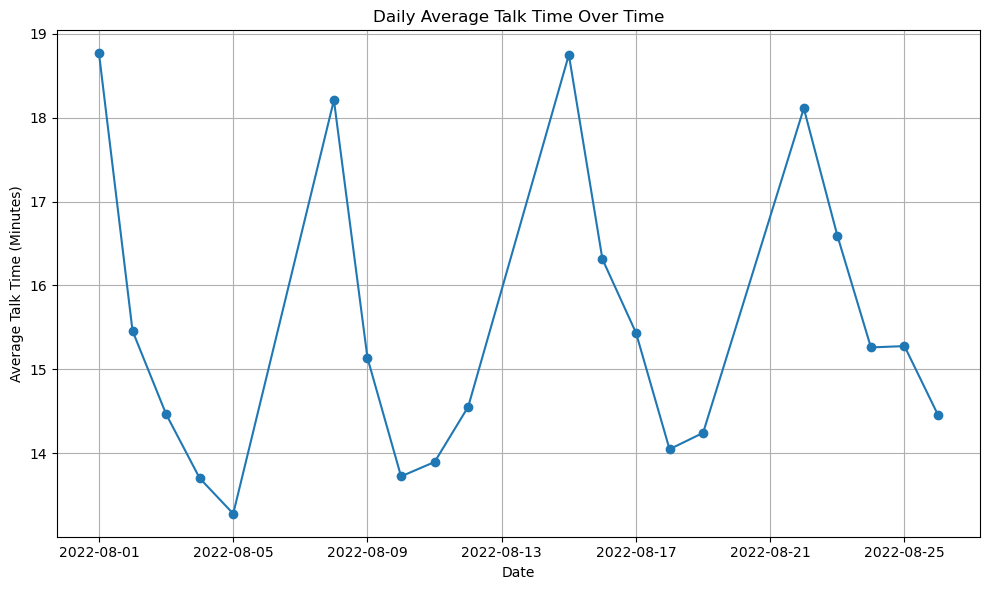

In [20]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_average_talk_time['Date'], daily_average_talk_time['Talk Time (Minutes)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Talk Time (Minutes)')
plt.title('Daily Average Talk Time Over Time')
plt.grid(True)
plt.tight_layout()

plt.show()

<a name="section2b"></a> 
### b) By team:

In [21]:
team = sheet4.groupby(['Agent Team']).count().reset_index()

# Calculate the total count of agents in the dataset
total_agents = team["Agent ID"].sum()

# Calculate the percentage of each team
team["Percentage"] = (team["Agent ID"] / total_agents) * 100

team

Agent Team  Agent ID  Percentage
0     team_0         2    2.061856
1     team_1        18   18.556701
2     team_2        20   20.618557
3     team_3        21   21.649485
4     team_4        20   20.618557
5     team_5        16   16.494845

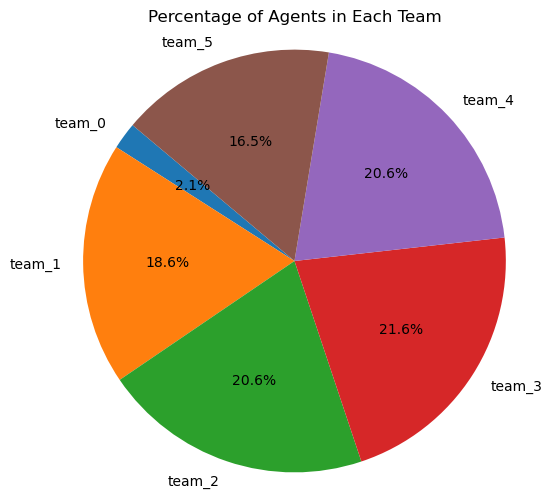

In [22]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(team["Percentage"], labels=team["Agent Team"], autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Agents in Each Team")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [23]:
team_sorted = hcc_df.groupby(['Agent Team'])[time_related_columns].sum().reset_index()
team_sorted

Agent Team Total Logged In Time   Not Ready Time       Ready Time  \
0     team_0      3 days 16:24:03  0 days 12:57:57  0 days 22:44:08   
1     team_1     75 days 04:53:42 12 days 19:19:08  5 days 19:34:04   
2     team_2     84 days 12:28:05 10 days 06:51:17 11 days 12:33:22   
3     team_3     79 days 19:29:40 12 days 06:22:59  4 days 05:44:38   
4     team_4     81 days 12:40:30 13 days 00:49:38  8 days 05:19:06   
5     team_5     69 days 10:11:24 13 days 21:20:34  8 days 01:08:17   

    Reserved Time        Talk Time Next Call Prep Time           Break  \
0 0 days 00:48:24  2 days 00:13:49     0 days 03:39:45 0 days 01:55:04   
1 1 days 02:31:59 51 days 14:01:33     3 days 21:26:58 1 days 23:02:38   
2 1 days 00:48:21 57 days 11:53:13     4 days 04:21:52 1 days 21:51:45   
3 0 days 23:58:18 58 days 04:10:55     4 days 03:12:50 2 days 08:05:57   
4 1 days 00:34:39 55 days 13:12:15     3 days 16:44:52 2 days 10:08:54   
5 0 days 18:56:26 43 days 14:38:13     3 days 02:07:54 2 days 15:54:24   

            Lunch    Team Support         Meeting After Call Work  \
0 0 days 04:03:32 0 days 00:00:25 0 days 00:48:54 0 days 02:04:47   
1 3 days 05:50:09 0 days 02:07:37 0 days 10:11:58 4 days 02:43:24   
2 3 days 17:02:24 0 days 00:27:27 0 days 02:25:50 2 days 05:15:26   
3 3 days 11:11:05 0 days 00:38:48 0 days 05:12:53 3 days 04:32:12   
4 3 days 14:35:12 0 days 00:07:33 0 days 16:25:29 4 days 06:23:59   
5 3 days 07:10:04 0 days 01:02:18 0 days 10:01:00 4 days 00:10:57   

  Special Projects        Training   System Issues           Other  
0  0 days 00:00:00 0 days 03:40:08 0 days 00:00:00 0 days 00:25:07  
1  0 days 15:41:54 1 days 14:41:09 0 days 01:59:19 0 days 15:01:00  
2  0 days 07:24:13 1 days 11:00:38 0 days 02:35:05 0 days 10:48:29  
3  0 days 10:52:08 1 days 20:25:28 0 days 05:54:10 0 days 11:30:18  
4  0 days 08:08:02 1 days 02:46:10 0 days 03:23:45 0 days 10:50:34  
5  0 days 04:45:48 2 days 13:00:58 0 days 01:27:27 0 days 15:47:38

In [24]:
time_columns = ['Total Logged In Time','Not Ready Time', 'Ready Time', 'Reserved Time', 'Talk Time', 'Next Call Prep Time', 'Break', 'Lunch',
                    'Team Support', 'Meeting', 'After Call Work', 'Special Projects', 'Training', 'System Issues', 'Other']

In [25]:
#By days
team_sorted2 = team_sorted.copy()

for col in time_columns:
    team_sorted2[col] = team_sorted2[col].dt.days + team_sorted2[col].dt.seconds / (3600 * 24)

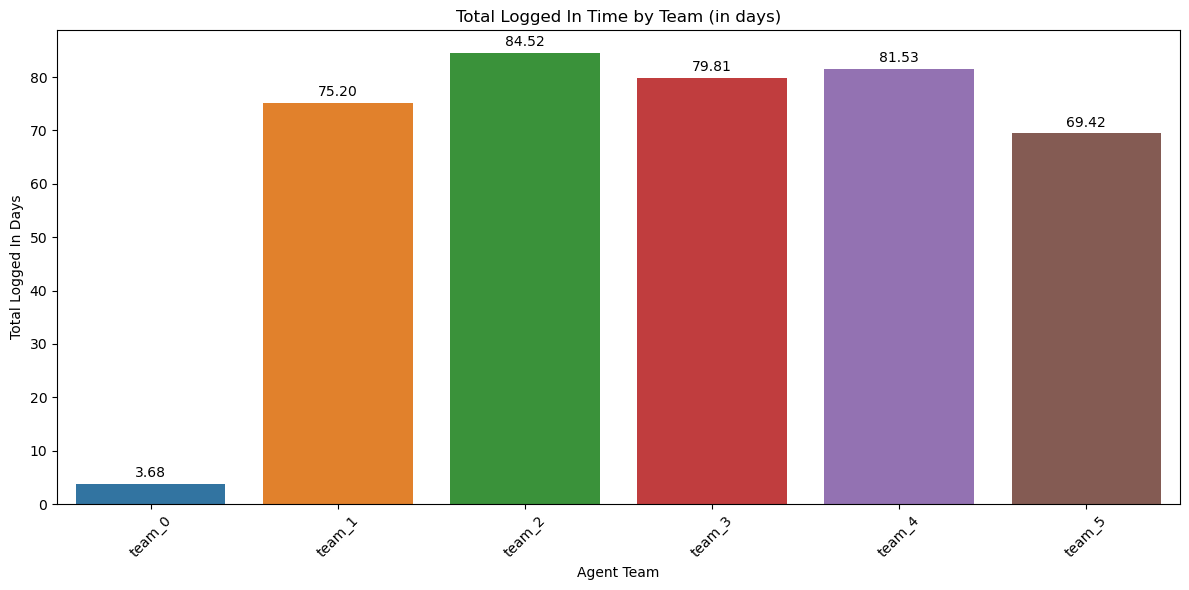

In [26]:
# Create a bar plot of Total Logged In Time by Team in days
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Agent Team', y='Total Logged In Time', data=team_sorted2)
plt.title('Total Logged In Time by Team (in days)')
plt.xlabel('Agent Team')
plt.ylabel('Total Logged In Days')
plt.xticks(rotation=45)

# Annotate each bar with its respective data
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

In [27]:
#By weeks
team_sorted3 = team_sorted2.copy()

for col in time_columns:
    team_sorted3[col] = team_sorted3[col] / 7

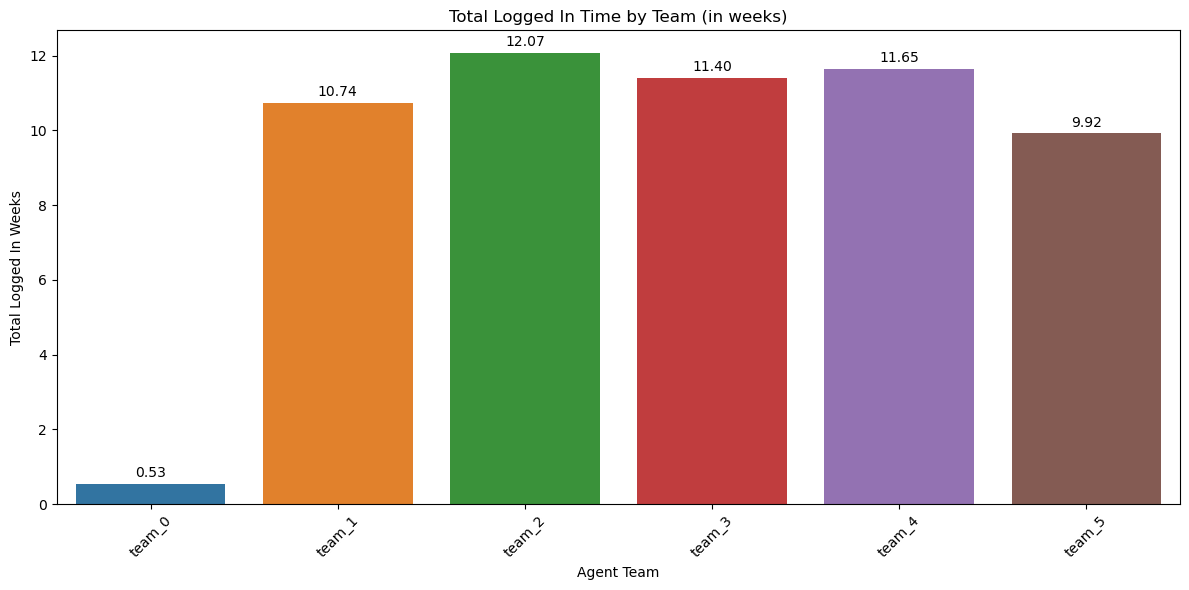

In [28]:
# Create a bar plot of Total Logged In Time by Team in weeks
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Agent Team', y='Total Logged In Time', data=team_sorted3)
plt.title('Total Logged In Time by Team (in weeks)')
plt.xlabel('Agent Team')
plt.ylabel('Total Logged In Weeks')
plt.xticks(rotation=45)

# Annotate each bar with its respective data
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

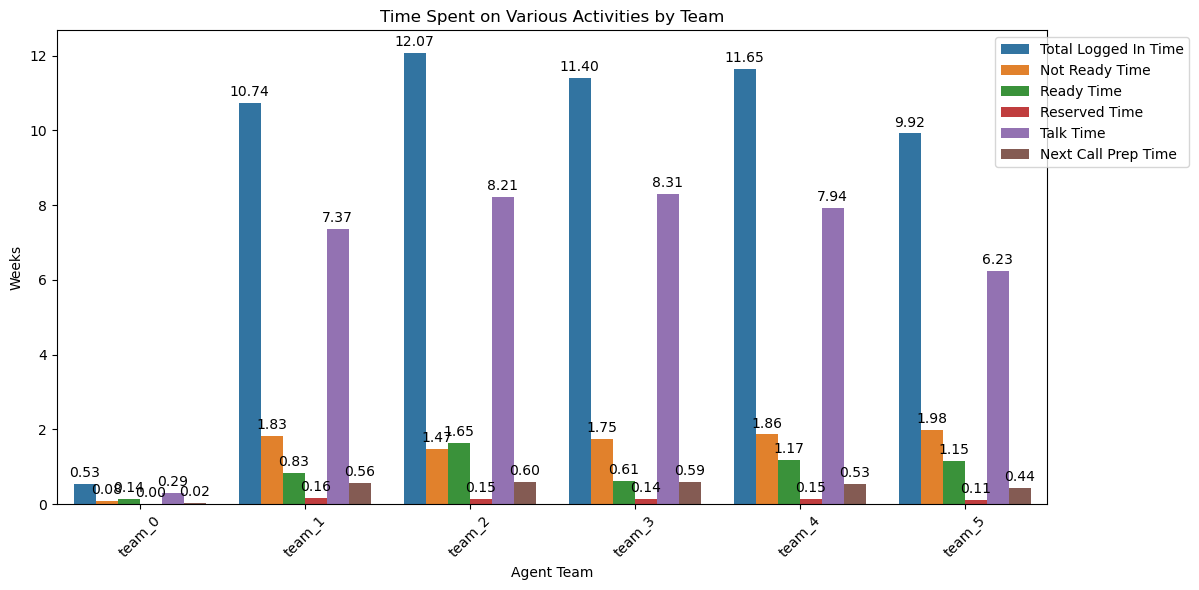

In [29]:
overall_activity = ['Total Logged In Time','Not Ready Time', 'Ready Time', 'Reserved Time', 'Talk Time', 'Next Call Prep Time']

# Create a stacked bar plot of various activities by Team
stacked_data = team_sorted3[['Agent Team'] + overall_activity].melt(id_vars='Agent Team', var_name='Activity', value_name='Time (Days)')

#Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Agent Team', y='Time (Days)', hue='Activity', data=stacked_data)
plt.title('Time Spent on Various Activities by Team')
plt.xlabel('Agent Team')
plt.ylabel('Weeks')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Annotate each bar with its respective data
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

**What percentage of logged-in time on average did teams spend on each task per time interval (on daily/weekly basis)?** 

In [30]:
# Calculate the percentage of time spent on each task
team_sorted22 = team_sorted2.iloc[:,:7].copy()

activity_columns = team_sorted22.columns[2:]  # Exclude 'Agent Team' and 'Total Logged In Time'
for activity in activity_columns:
    team_sorted22[activity] = (team_sorted22[activity] / team_sorted22['Total Logged In Time']) * 100

# Rename the column
team_sorted22 = team_sorted22.drop(['Total Logged In Time'], axis = 1)

# Display the result
team_sorted22.reset_index()

index Agent Team  Not Ready Time  Ready Time  Reserved Time  Talk Time  \
0      0     team_0       14.667094   25.718712       0.912510  54.558623   
1      1     team_1       17.026968    7.732737       1.470061  68.592679   
2      2     team_2       12.169515   13.633742       1.222885  68.026062   
3      3     team_3       15.368515    5.311625       1.251461  72.888854   
4      4     team_4       15.987695   10.084369       1.256085  68.136209   
5      5     team_5       20.006288   11.591599       1.136758  62.816182   

   Next Call Prep Time  
0             4.143060  
1             5.177556  
2             4.947795  
3             5.179545  
4             4.535642  
5             4.449172

In [31]:
team_sorted22.columns

Index(['Agent Team', 'Not Ready Time', 'Ready Time', 'Reserved Time',
       'Talk Time', 'Next Call Prep Time'],
      dtype='object')

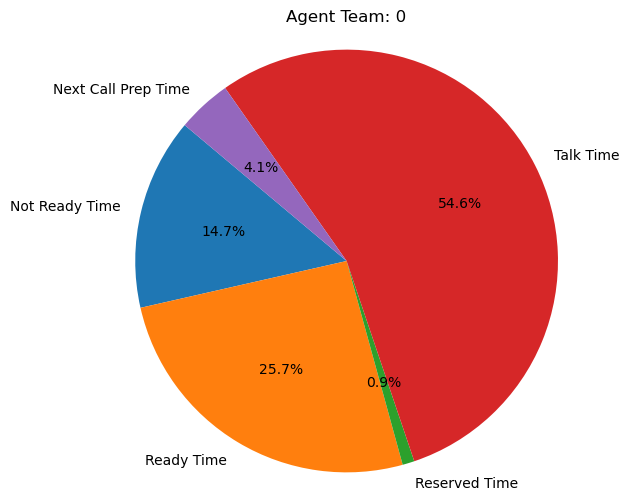

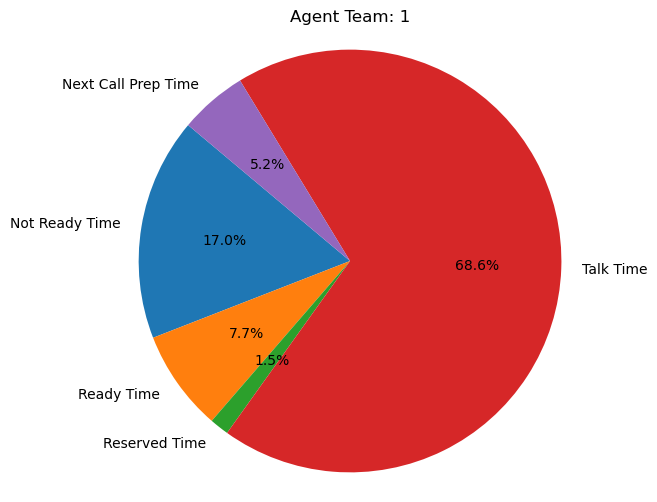

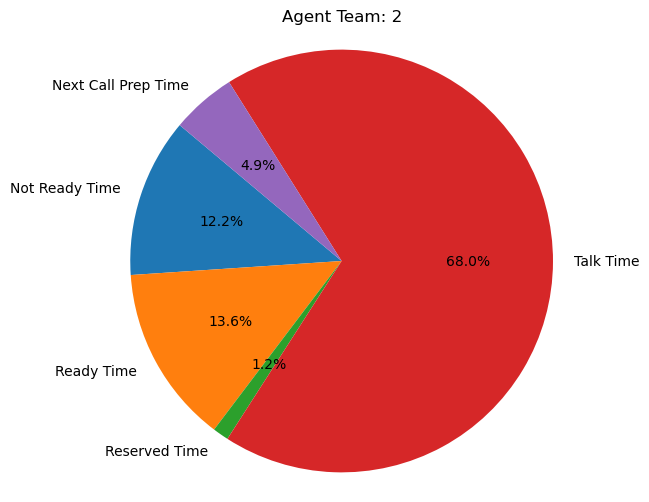

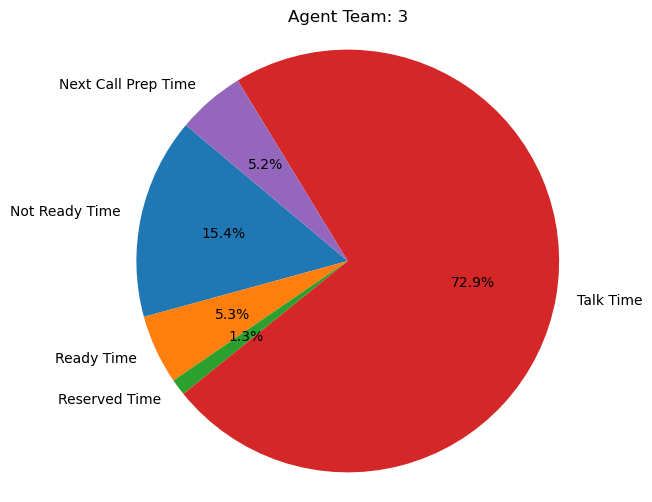

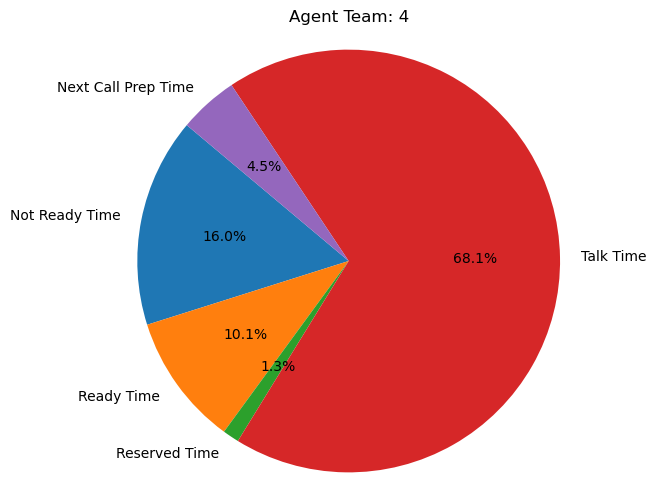

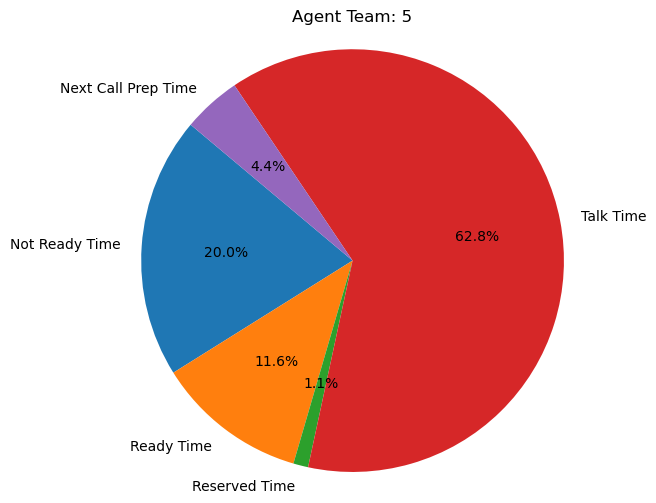

In [32]:
# Group the data by 'Agent Team' and sum the time spent in each activity
team_activity_totals = team_sorted22.groupby('Agent Team').sum().reset_index()

# List of activities (excluding 'Agent Team' column)
activities = team_activity_totals.columns[1:]

# Create a pie chart for each agent team
for team in team_activity_totals.index:
    team_data = team_activity_totals.loc[team, activities]
    plt.figure(figsize=(6, 6))
    plt.pie(team_data, labels=activities, autopct='%1.1f%%', startangle=140)
    plt.title(f'Agent Team: {team}')
    plt.axis('equal')
    plt.show()

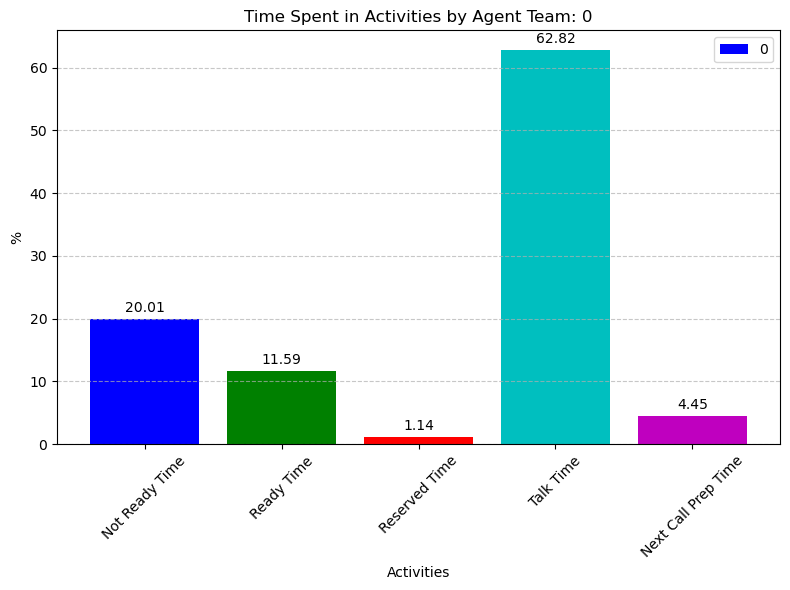

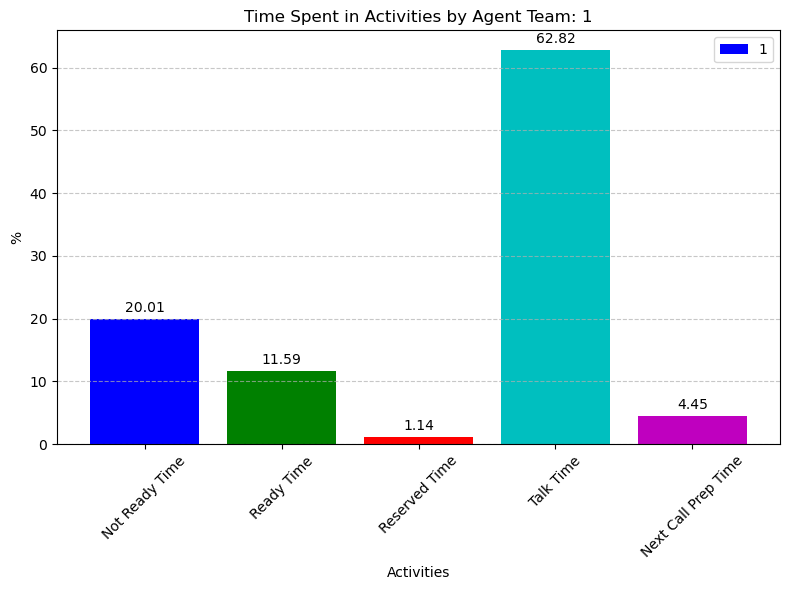

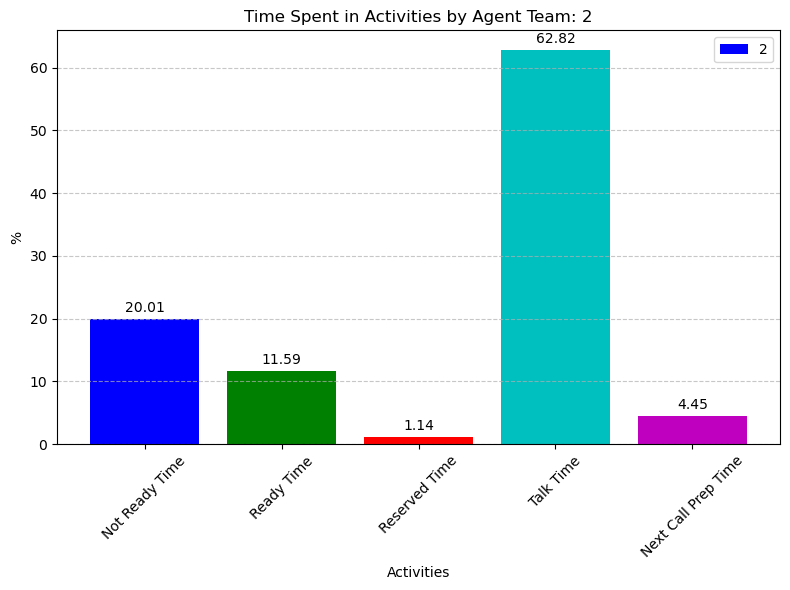

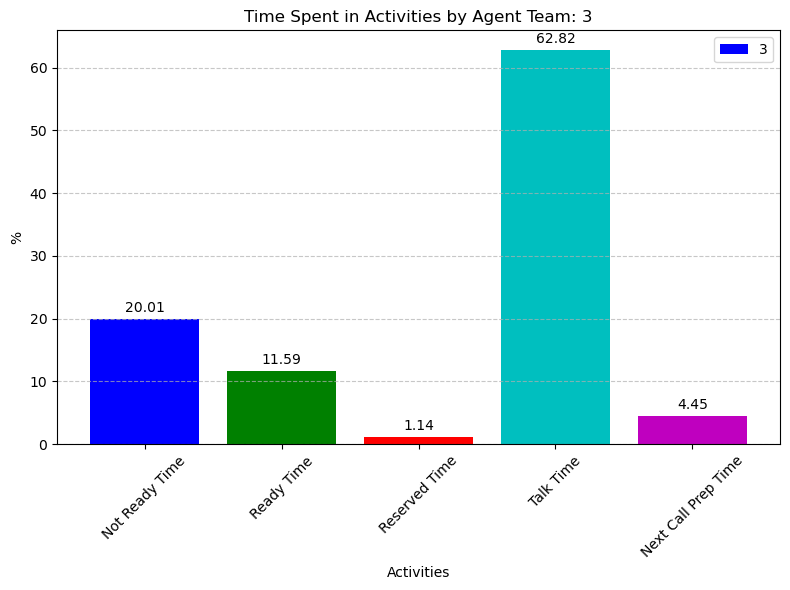

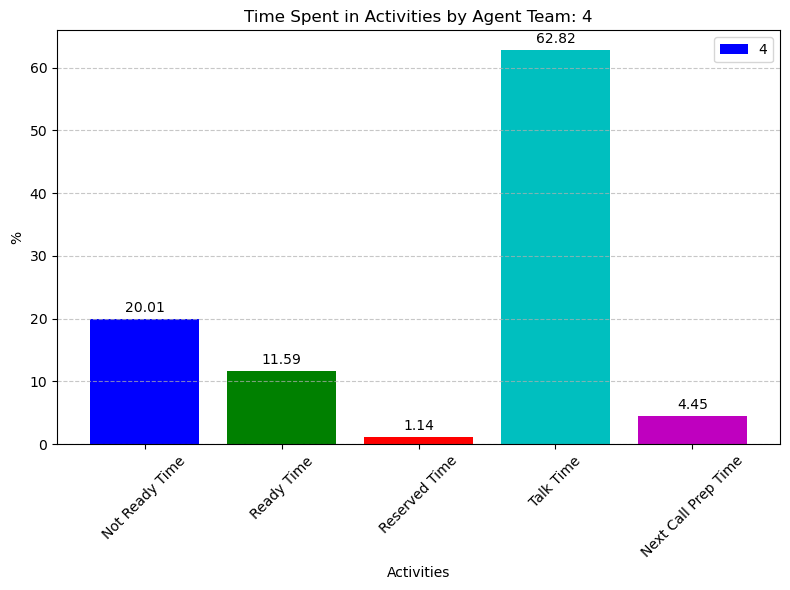

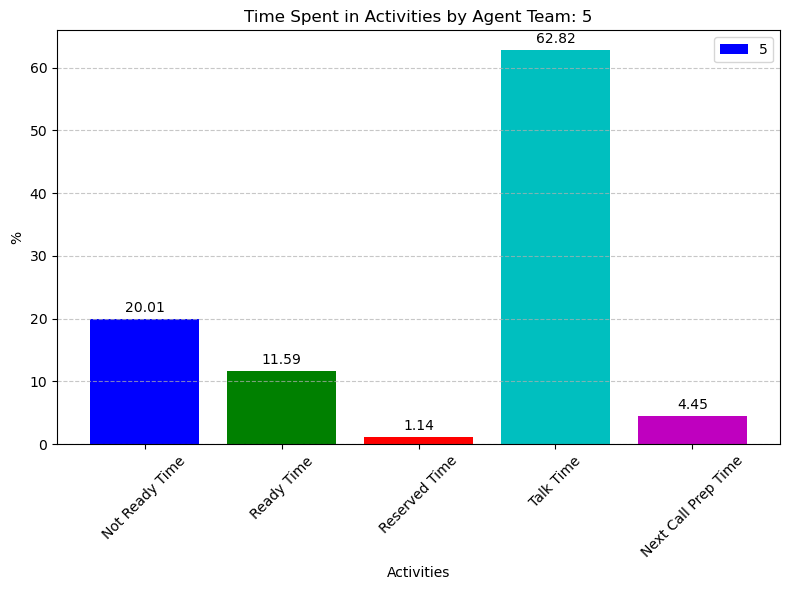

In [33]:
# Create a bar chart for each agent team with customizations
for team in team_activity_totals.index:
    team_data2 = team_activity_totals.loc[team, activities]
    plt.figure(figsize=(8, 6))
    
    # Set custom colors for bars
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']
    
    ax = plt.bar(activities, team_data, label=team, color=colors)
    plt.title(f'Time Spent in Activities by Agent Team: {team}')
    plt.xlabel('Activities')
    plt.ylabel('%')
    plt.legend()
    
    # Customize gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    
    # Annotate each bar with its respective data
    for p in ax:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

In [34]:
# Specify the column names to copy
columns_to_copy = ["Agent Team"] + ["Not Ready Time"] + list(team_sorted2.columns[-9:])

# Create a new DataFrame with the selected columns
team_sorted23 = team_sorted2[columns_to_copy].copy()

# Exclude 'Agent Team' and 'Not Ready Time'
activity_columns2 = team_sorted23.columns[2:]  
for activity in activity_columns2:
    team_sorted23[activity] = (team_sorted23[activity] / team_sorted23['Not Ready Time']) * 100

# Rename the column
team_sorted23 = team_sorted23.drop(['Not Ready Time'], axis = 1)

# Display the result
team_sorted23.reset_index()

index Agent Team      Break      Lunch  Team Support   Meeting  \
0      0     team_0  14.791011  31.304497      0.053560  6.285751   
1      1     team_1  15.307842  25.327383      0.692097  3.318847   
2      2     team_2  18.578741  36.069798      0.185332  0.984610   
3      3     team_3  19.056520  28.257306      0.219668  1.771407   
4      4     team_4  18.588003  27.678751      0.040225  5.250413   
5      5     team_5  19.171457  23.749660      0.311491  3.004915   

   After Call Work  Special Projects   Training  System Issues     Other  
0        16.040020          0.000000  28.296591       0.000000  3.228571  
1        32.124069          5.108158  12.588173       0.647084  4.886347  
2        21.574318          2.999177  14.182656       1.047062  4.378306  
3        25.999005          3.692091  15.090693       2.005135  3.908173  
4        32.733635          2.600122   8.557262       1.085530  3.466060  
5        28.853932          1.428960  18.304315       0.437238  4.738032

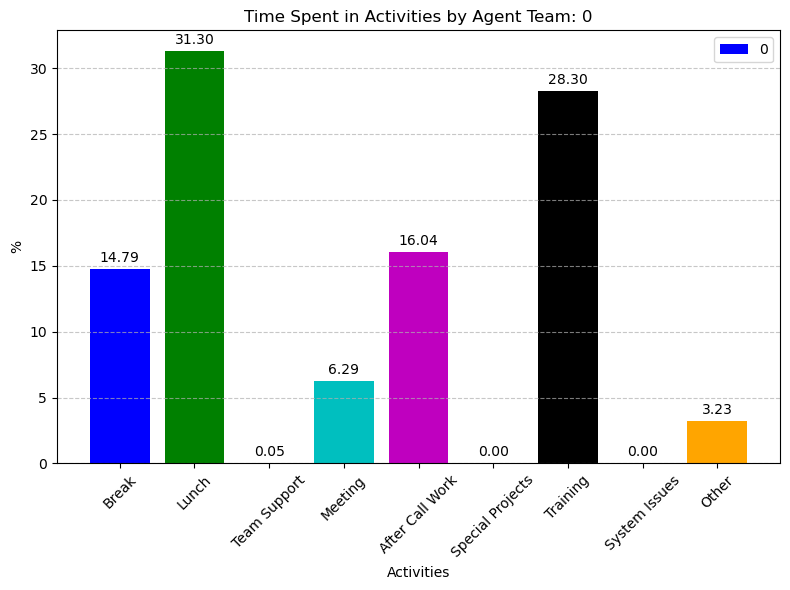

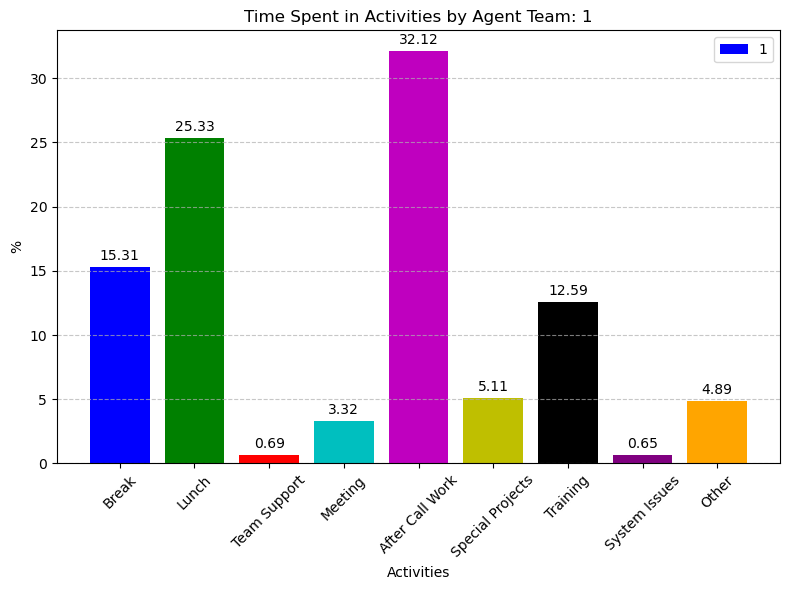

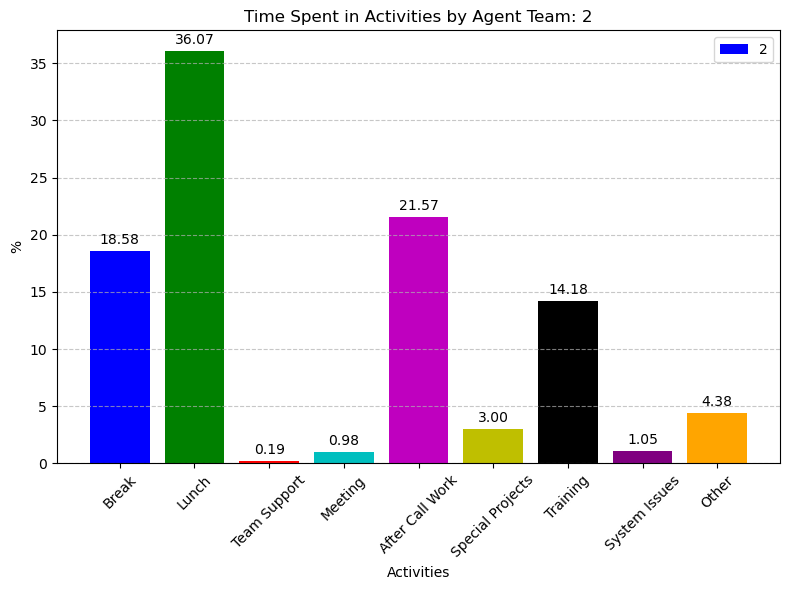

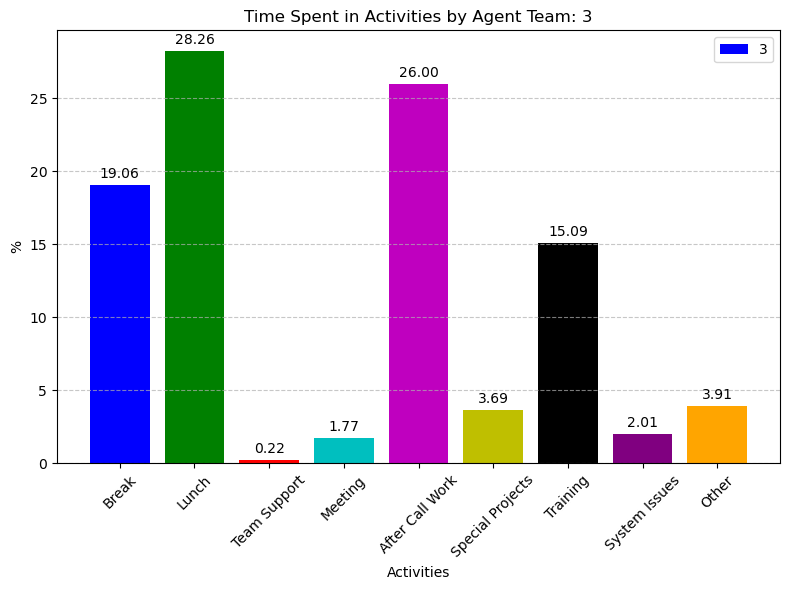

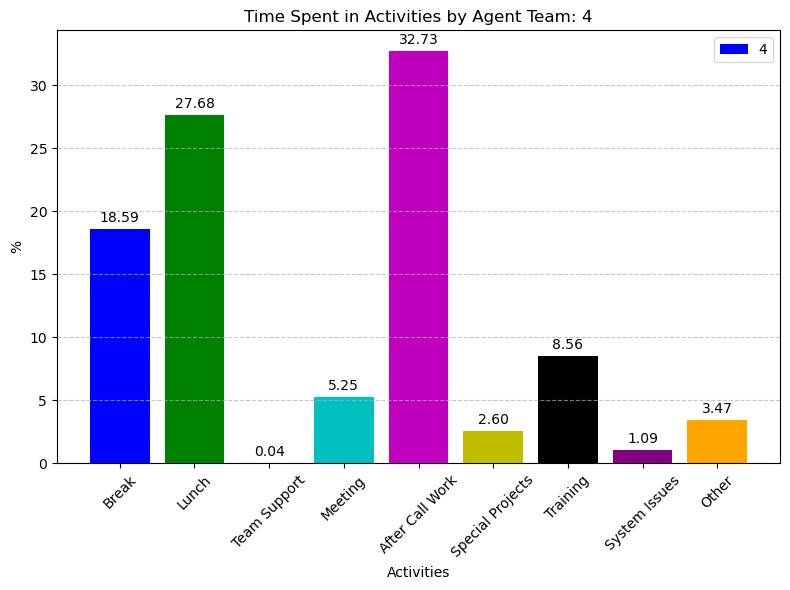

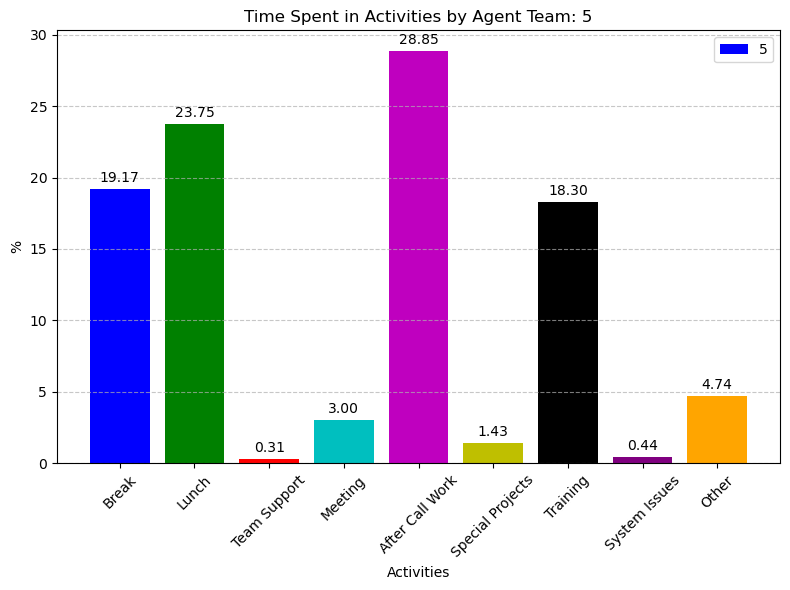

In [35]:
# Group the data by 'Agent Team' and sum the time spent in each activity
team_activity_totals2 = team_sorted23.groupby('Agent Team').sum().reset_index()

# List of activities (excluding 'Agent Team' column)
activities2 = team_activity_totals2.columns[1:]


# Create a bar chart for each agent team with customizations
for team in team_activity_totals2.index:
    team_data2 = team_activity_totals2.loc[team, activities2]
    plt.figure(figsize=(8, 6))
    
    # Set custom colors for bars
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']
    
    ax = plt.bar(activities2, team_data2, label=team, color=colors)
    plt.title(f'Time Spent in Activities by Agent Team: {team}')
    plt.xlabel('Activities')
    plt.ylabel('%')
    plt.legend()
    
    # Customize gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    # Annotate each bar with its respective data
    for p in ax:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    
    plt.show()

**What is agents/teams utilization rate (on daily basis)? How about non-utilized time?**

In [36]:
copied_df = hcc_df.copy()

for col in time_related_columns:
    copied_df[col] = copied_df[col].dt.total_seconds() / (3600 * 24) 
    
copied_df

Agent ID Agent Team       Date Interval Start Time   Interval End Time  \
0       Agent 1     team_1 2022-08-01 2022-08-01 08:00:00 2022-08-01 08:30:00   
1       Agent 1     team_1 2022-08-01 2022-08-01 08:30:00 2022-08-01 09:00:00   
2       Agent 1     team_1 2022-08-01 2022-08-01 09:00:00 2022-08-01 09:30:00   
3       Agent 1     team_1 2022-08-01 2022-08-01 09:30:00 2022-08-01 10:00:00   
4       Agent 1     team_1 2022-08-01 2022-08-01 10:00:00 2022-08-01 10:30:00   
...         ...        ...        ...                 ...                 ...   
24907  Agent 97     team_3 2022-08-26 2022-08-26 14:30:00 2022-08-26 15:00:00   
24908  Agent 97     team_3 2022-08-26 2022-08-26 15:00:00 2022-08-26 15:30:00   
24909  Agent 97     team_3 2022-08-26 2022-08-26 15:30:00 2022-08-26 16:00:00   
24910  Agent 97     team_3 2022-08-26 2022-08-26 16:00:00 2022-08-26 16:30:00   
24911  Agent 97     team_3 2022-08-26 2022-08-26 16:30:00 2022-08-26 17:00:00   

       Total Logged In Time  Not Ready Time  Ready Time  Reserved Time  \
0                  0.018773        0.002384    0.000081       0.000255   
1                  0.020833        0.001076    0.001296       0.000382   
2                  0.020833        0.002963    0.000000       0.000428   
3                  0.020833        0.004329    0.000000       0.000174   
4                  0.020833        0.001262    0.000000       0.000174   
...                     ...             ...         ...            ...   
24907              0.020833        0.000000    0.002859       0.000255   
24908              0.020833        0.000000    0.010127       0.000231   
24909              0.020833        0.003113    0.013252       0.000104   
24910              0.020833        0.000000    0.004641       0.000150   
24911              0.001366        0.000127    0.000000       0.000000   

       Talk Time  Next Call Prep Time     Break  Lunch  Team Support  Meeting  \
0       0.015174             0.000880  0.000000    0.0           0.0      0.0   
1       0.017002             0.001076  0.000000    0.0           0.0      0.0   
2       0.015984             0.001458  0.000012    0.0           0.0      0.0   
3       0.015544             0.000787  0.004329    0.0           0.0      0.0   
4       0.018715             0.000683  0.000000    0.0           0.0      0.0   
...          ...                  ...       ...    ...           ...      ...   
24907   0.016563             0.001157  0.000000    0.0           0.0      0.0   
24908   0.009780             0.000694  0.000000    0.0           0.0      0.0   
24909   0.003669             0.000694  0.003113    0.0           0.0      0.0   
24910   0.015579             0.000463  0.000000    0.0           0.0      0.0   
24911   0.001157             0.000081  0.000000    0.0           0.0      0.0   

       After Call Work  Special Projects  Training  System Issues     Other  
0             0.002350               0.0  0.000000            0.0  0.000035  
1             0.001076               0.0  0.000000            0.0  0.000000  
2             0.002951               0.0  0.000000            0.0  0.000000  
3             0.000000               0.0  0.000000            0.0  0.000000  
4             0.001262               0.0  0.000000            0.0  0.000000  
...                ...               ...       ...            ...       ...  
24907         0.000000               0.0  0.000000            0.0  0.000000  
24908         0.000000               0.0  0.000000            0.0  0.000000  
24909         0.000000               0.0  0.000000            0.0  0.000000  
24910         0.000000               0.0  0.000000            0.0  0.000000  
24911         0.000000               0.0  0.000127            0.0  0.000000  

[24912 rows x 20 columns]

In [37]:
# Group data by day and calculate metrics
daily_metrics = copied_df.resample('D', on='Date').agg({
    'Agent ID': 'nunique',
    'Agent Team': 'nunique',
    'Total Logged In Time': 'sum',
    'Talk Time': 'sum',
    'Reserved Time': 'sum',
    'Ready Time': 'sum',
    'Not Ready Time': 'sum'
    # Count unique agents per day
}).reset_index()

In [38]:
daily_metrics

Date  Agent ID  Agent Team  Total Logged In Time  Talk Time  \
0  2022-08-01        72           6             22.497778  16.891944   
1  2022-08-02        70           6             18.478287  13.524988   
2  2022-08-03        76           6             21.292801  13.740868   
3  2022-08-04        73           6             19.299444  12.501030   
4  2022-08-05        65           6             17.548275  10.786806   
5  2022-08-06         0           0              0.000000   0.000000   
6  2022-08-07         0           0              0.000000   0.000000   
7  2022-08-08        76           6             25.178576  17.300139   
8  2022-08-09        74           6             21.129942  13.998750   
9  2022-08-10        74           6             20.431238  12.692361   
10 2022-08-11        70           6             18.688819  12.156539   
11 2022-08-12        60           5             16.096632  10.913530   
12 2022-08-13         0           0              0.000000   0.000000   
13 2022-08-14         0           0              0.000000   0.000000   
14 2022-08-15        66           6             20.715914  15.470359   
15 2022-08-16        67           6             19.318831  13.662639   
16 2022-08-17        67           6             18.630799  12.926655   
17 2022-08-18        71           6             19.512106  12.465220   
18 2022-08-19        63           6             17.587118  11.214699   
19 2022-08-20         0           0              0.000000   0.000000   
20 2022-08-21         0           0              0.000000   0.000000   
21 2022-08-22        77           5             25.329861  17.434664   
22 2022-08-23        70           5             20.517870  14.519931   
23 2022-08-24        69           5             18.978657  13.161956   
24 2022-08-25        64           5             17.072141  12.220648   
25 2022-08-26        60           5             15.866713  10.839861   

    Reserved Time  Ready Time  Not Ready Time  
0        0.266319    0.638623        3.631736  
1        0.259549    1.044062        2.724259  
2        0.276806    2.852882        3.432037  
3        0.248403    2.086516        3.550139  
4        0.211725    2.886794        2.861366  
5        0.000000    0.000000        0.000000  
6        0.000000    0.000000        0.000000  
7        0.302558    2.840532        3.557419  
8        0.270428    2.601551        3.217431  
9        0.262870    2.879653        3.633553  
10       0.224375    2.393310        3.045046  
11       0.200440    1.614734        2.574722  
12       0.000000    0.000000        0.000000  
13       0.000000    0.000000        0.000000  
14       0.254618    0.877454        3.094780  
15       0.255833    1.322859        3.104005  
16       0.244352    1.701910        2.826736  
17       0.239815    2.568322        3.325787  
18       0.218519    2.565370        2.779502  
19       0.000000    0.000000        0.000000  
20       0.000000    0.000000        0.000000  
21       0.336597    2.388032        3.897743  
22       0.263889    1.293368        3.374757  
23       0.247176    1.527650        3.043877  
24       0.209502    1.155058        2.637894  
25       0.191030    1.555475        2.507731

In [39]:
# Define a function to calculate utilization rate
def calculate_utilization_rate(copied_df):
    utilization_time = copied_df['Ready Time'] + copied_df['Talk Time'] + copied_df['Reserved Time']
    utilization_rate = utilization_time / copied_df['Total Logged In Time']
    return utilization_rate

# Define a function to calculate non-utilized time
def calculate_non_utilized_rate(copied_df):
    non_utilized_rate = copied_df['Not Ready Time'] / copied_df['Total Logged In Time']
    return non_utilized_rate

# Calculate utilization rate and non-utilized time
daily_metrics['Utilization Rate'] = calculate_utilization_rate(daily_metrics)
daily_metrics['Non-Utilized Rate'] = calculate_non_utilized_rate(daily_metrics)

# Print the weekly metrics
daily_metrics.reset_index()

index       Date  Agent ID  Agent Team  Total Logged In Time  Talk Time  \
0       0 2022-08-01        72           6             22.497778  16.891944   
1       1 2022-08-02        70           6             18.478287  13.524988   
2       2 2022-08-03        76           6             21.292801  13.740868   
3       3 2022-08-04        73           6             19.299444  12.501030   
4       4 2022-08-05        65           6             17.548275  10.786806   
5       5 2022-08-06         0           0              0.000000   0.000000   
6       6 2022-08-07         0           0              0.000000   0.000000   
7       7 2022-08-08        76           6             25.178576  17.300139   
8       8 2022-08-09        74           6             21.129942  13.998750   
9       9 2022-08-10        74           6             20.431238  12.692361   
10     10 2022-08-11        70           6             18.688819  12.156539   
11     11 2022-08-12        60           5             16.096632  10.913530   
12     12 2022-08-13         0           0              0.000000   0.000000   
13     13 2022-08-14         0           0              0.000000   0.000000   
14     14 2022-08-15        66           6             20.715914  15.470359   
15     15 2022-08-16        67           6             19.318831  13.662639   
16     16 2022-08-17        67           6             18.630799  12.926655   
17     17 2022-08-18        71           6             19.512106  12.465220   
18     18 2022-08-19        63           6             17.587118  11.214699   
19     19 2022-08-20         0           0              0.000000   0.000000   
20     20 2022-08-21         0           0              0.000000   0.000000   
21     21 2022-08-22        77           5             25.329861  17.434664   
22     22 2022-08-23        70           5             20.517870  14.519931   
23     23 2022-08-24        69           5             18.978657  13.161956   
24     24 2022-08-25        64           5             17.072141  12.220648   
25     25 2022-08-26        60           5             15.866713  10.839861   

    Reserved Time  Ready Time  Not Ready Time  Utilization Rate  \
0        0.266319    0.638623        3.631736          0.791051   
1        0.259549    1.044062        2.724259          0.802488   
2        0.276806    2.852882        3.432037          0.792313   
3        0.248403    2.086516        3.550139          0.768724   
4        0.211725    2.886794        2.861366          0.791264   
5        0.000000    0.000000        0.000000               NaN   
6        0.000000    0.000000        0.000000               NaN   
7        0.302558    2.840532        3.557419          0.811930   
8        0.270428    2.601551        3.217431          0.798428   
9        0.262870    2.879653        3.633553          0.775033   
10       0.224375    2.393310        3.045046          0.790538   
11       0.200440    1.614734        2.574722          0.790768   
12       0.000000    0.000000        0.000000               NaN   
13       0.000000    0.000000        0.000000               NaN   
14       0.254618    0.877454        3.094780          0.801434   
15       0.255833    1.322859        3.104005          0.788937   
16       0.244352    1.701910        2.826736          0.798297   
17       0.239815    2.568322        3.325787          0.782763   
18       0.218519    2.565370        2.779502          0.795957   
19       0.000000    0.000000        0.000000               NaN   
20       0.000000    0.000000        0.000000               NaN   
21       0.336597    2.388032        3.897743          0.795871   
22       0.263889    1.293368        3.374757          0.783570   
23       0.247176    1.527650        3.043877          0.787031   
24       0.209502    1.155058        2.637894          0.795753   
25       0.191030    1.555475        2.507731          0.793256   

    Non-Utilized Rate  
0            0.161426  
1           

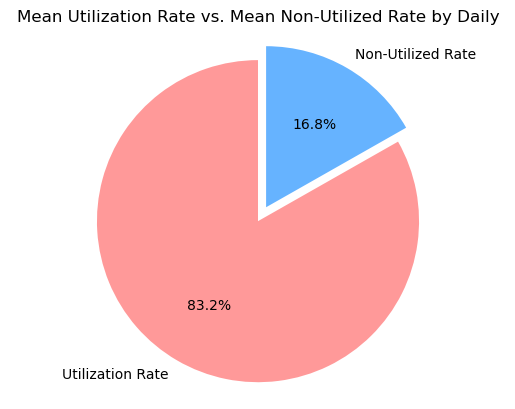

In [40]:
# Calculate the mean utilization rate and non-utilization rate
mean_utilization_rate = daily_metrics['Utilization Rate'].mean()
mean_non_utilization_rate = daily_metrics['Non-Utilized Rate'].mean()

# Create a pie chart
labels = ['Utilization Rate', 'Non-Utilized Rate']
sizes = [mean_utilization_rate, mean_non_utilization_rate]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Mean Utilization Rate vs. Mean Non-Utilized Rate by Daily')
plt.show()

**What is agents/teams utilization rate (on weekly basis)? How about non-utilized time?**

In [41]:
# Group data by week and calculate metrics
weekly_metrics = copied_df.resample('W', on='Date').agg({
    'Agent ID': 'nunique',
    'Agent Team': 'nunique',
    'Total Logged In Time': 'sum',
    'Talk Time': 'sum',
    'Reserved Time': 'sum',
    'Ready Time': 'sum',
    'Not Ready Time': 'sum'
    # Count unique agents per week
}).reset_index()

In [42]:
# Calculate utilization rate and non-utilized time
weekly_metrics['Utilization Rate'] = calculate_utilization_rate(weekly_metrics)
weekly_metrics['Non-Utilized Rate'] = calculate_non_utilized_rate(weekly_metrics)

weekly_metrics.rename(columns={'Date': 'Week'}, inplace=True)

# Print the weekly metrics
weekly_metrics.reset_index()

index       Week  Agent ID  Agent Team  Total Logged In Time  Talk Time  \
0      0 2022-08-07        90           6             99.116586  67.445637   
1      1 2022-08-14        87           6            101.525208  67.061319   
2      2 2022-08-21        89           6             95.764769  65.739572   
3      3 2022-08-28        88           5             97.765243  68.177060   

   Reserved Time  Ready Time  Not Ready Time  Utilization Rate  \
0       1.262801    9.508877       16.199537          0.789145   
1       1.260671   12.329780       16.028171          0.794401   
2       1.213137    9.035914       15.130810          0.793492   
3       1.248194    7.919583       15.462002          0.791128   

   Non-Utilized Rate  
0           0.163439  
1           0.157874  
2           0.158000  
3           0.158154

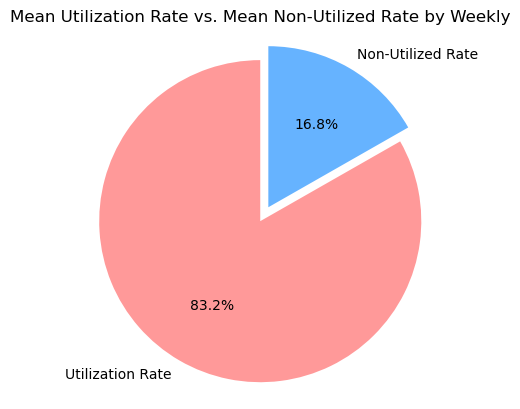

In [43]:
# Calculate the mean utilization rate and non-utilization rate
mean_utilization_rate2 = weekly_metrics['Utilization Rate'].mean()
mean_non_utilization_rate2 = weekly_metrics['Non-Utilized Rate'].mean()

# Create a pie chart
labels = ['Utilization Rate', 'Non-Utilized Rate']
sizes = [mean_utilization_rate2, mean_non_utilization_rate2]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Mean Utilization Rate vs. Mean Non-Utilized Rate by Weekly')
plt.show()

In [44]:
weekly_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week                  4 non-null      datetime64[ns]
 1   Agent ID              4 non-null      int64         
 2   Agent Team            4 non-null      int64         
 3   Total Logged In Time  4 non-null      float64       
 4   Talk Time             4 non-null      float64       
 5   Reserved Time         4 non-null      float64       
 6   Ready Time            4 non-null      float64       
 7   Not Ready Time        4 non-null      float64       
 8   Utilization Rate      4 non-null      float64       
 9   Non-Utilized Rate     4 non-null      float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 448.0 bytes


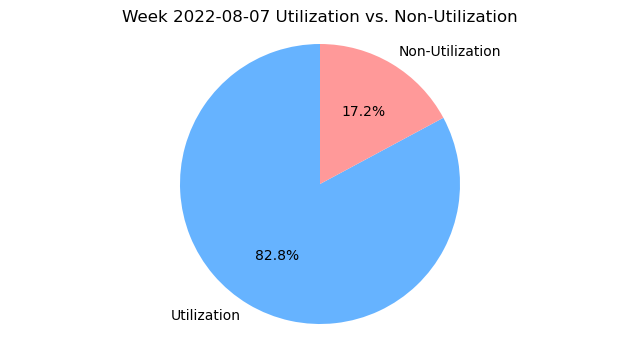

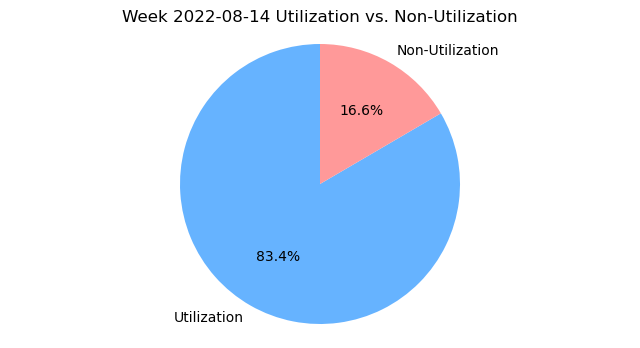

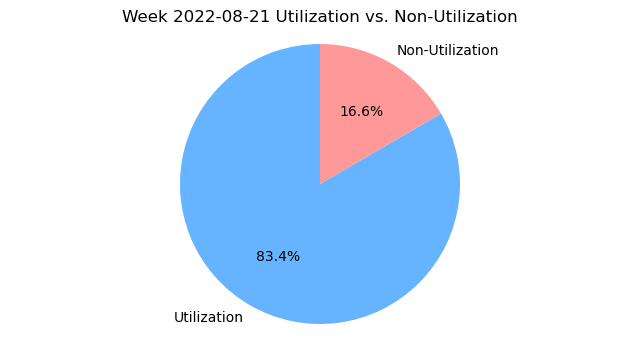

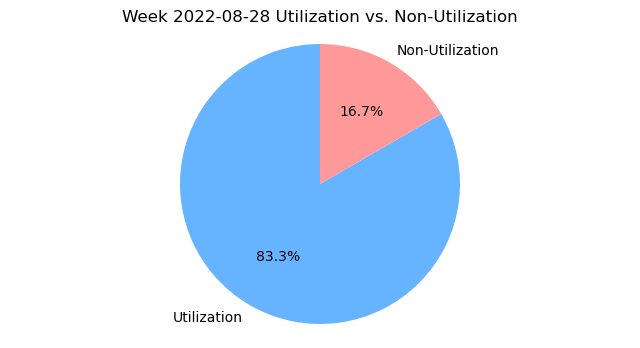

In [45]:
# Extract the relevant data for visualization
weeks = weekly_metrics['Week'].tolist()
utilization_rates = weekly_metrics['Utilization Rate'].tolist()
non_utilization_rates = weekly_metrics['Non-Utilized Rate'].tolist()

# Create pie charts for each week
for week, utilization_rate, non_utilization_rate in zip(weeks, utilization_rates, non_utilization_rates):
    plt.figure(figsize=(8, 4))
    labels = ['Utilization', 'Non-Utilization']
    sizes = [utilization_rate, non_utilization_rate]
    colors = ['#66b3ff', '#ff9999']  # Blue for utilization, red for non-utilization
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Week {week.strftime("%Y-%m-%d")} Utilization vs. Non-Utilization')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

In [46]:
weekly_metrics2 = weekly_metrics.copy()

# Initialize a counter
counter = 1

# Create a dictionary to store the mapping of old values to new values
week_mapping = {}

# Iterate through the unique values in the 'Week' column
for week in weekly_metrics2['Week'].unique():
    week_mapping[week] = str(counter)
    counter += 1

# Replace the values in the 'Week' column using the mapping
weekly_metrics2['Week'] = weekly_metrics2['Week'].map(week_mapping)

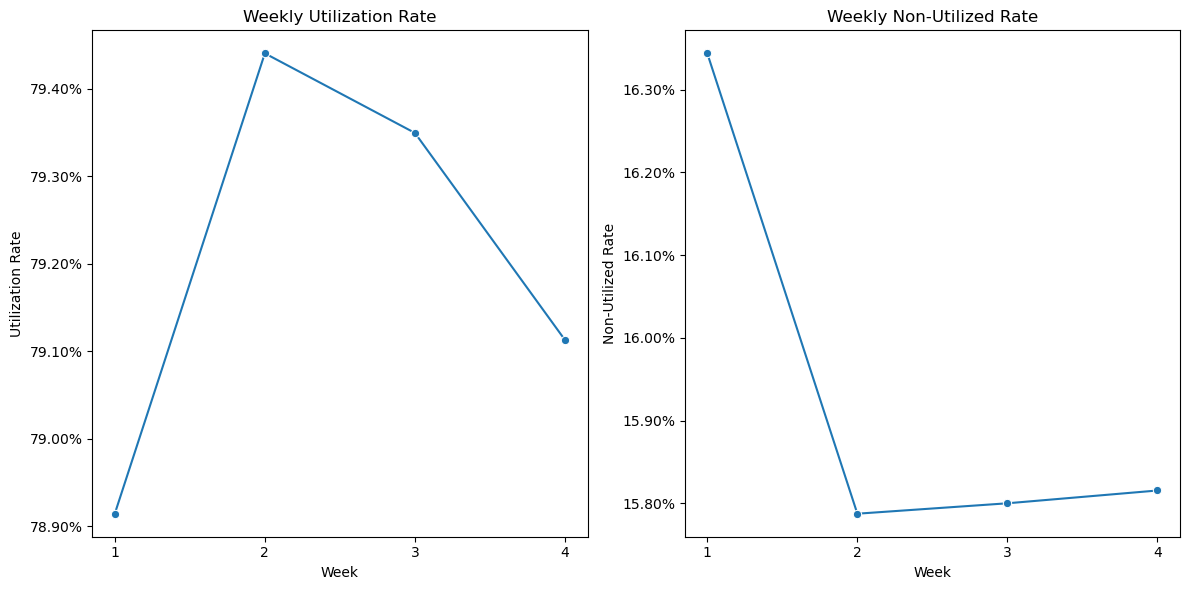

In [47]:
import matplotlib.ticker as mtick  # Import the necessary module for formatting y-axis as percentages

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Week', y='Utilization Rate', data=weekly_metrics2, marker='o')
plt.title("Weekly Utilization Rate")
plt.xlabel("Week")
plt.ylabel("Utilization Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentages

plt.subplot(1, 2, 2)
sns.lineplot(x='Week', y='Non-Utilized Rate', data=weekly_metrics2, marker='o')
plt.title("Weekly Non-Utilized Rate")
plt.xlabel("Week")
plt.ylabel("Non-Utilized Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentages

plt.tight_layout()
plt.show()

In [48]:
# Calculate the number of FTEs (assuming a 40-hour workweek)
weekly_metrics2['FTEs'] = (weekly_metrics2['Utilization Rate'] * 40) / (60 * 5)  # 60 minutes per hour, 5 workdays per week

# Print the weekly metrics
weekly_metrics2.reset_index()

index Week  Agent ID  Agent Team  Total Logged In Time  Talk Time  \
0      0    1        90           6             99.116586  67.445637   
1      1    2        87           6            101.525208  67.061319   
2      2    3        89           6             95.764769  65.739572   
3      3    4        88           5             97.765243  68.177060   

   Reserved Time  Ready Time  Not Ready Time  Utilization Rate  \
0       1.262801    9.508877       16.199537          0.789145   
1       1.260671   12.329780       16.028171          0.794401   
2       1.213137    9.035914       15.130810          0.793492   
3       1.248194    7.919583       15.462002          0.791128   

   Non-Utilized Rate      FTEs  
0           0.163439  0.105219  
1           0.157874  0.105920  
2           0.158000  0.105799  
3           0.158154  0.105484

In [49]:
# Group data by team and calculate average talk time per call
team_avg_talk_time = hcc_df.groupby('Agent Team')['Talk Time'].mean()
highest_avg_talk_time_team = team_avg_talk_time.idxmax()
lowest_avg_talk_time_team = team_avg_talk_time.idxmin()

In [50]:
highest_avg_talk_time_team

'team_3'

In [51]:
lowest_avg_talk_time_team

'team_0'

**How does the number of handled calls vary by specialty (Agent Team) on a weekly basis?**

In [52]:
# Merge sheet3 with merged_df on 'Agent ID' and 'Date'
hcc_df2 = pd.merge(sheet3, sheet4, on=['Agent ID'])
hcc_df2

Agent ID       Date  Number of Calls Handled Average Handle Time  \
0      Agent 1 2022-08-01                       94            00:04:40   
1      Agent 1 2022-08-02                       80            00:04:42   
2      Agent 1 2022-08-03                       81            00:04:34   
3      Agent 1 2022-08-04                       73            00:05:12   
4      Agent 1 2022-08-05                       75            00:04:51   
...        ...        ...                      ...                 ...   
1914  Agent 72 2022-08-22                        0            00:00:00   
1915  Agent 72 2022-08-23                        0            00:00:00   
1916  Agent 72 2022-08-24                        0            00:00:00   
1917  Agent 72 2022-08-25                        0            00:00:00   
1918  Agent 72 2022-08-26                        0            00:00:00   

     Agent Team  
0        team_1  
1        team_1  
2        team_1  
3        team_1  
4        team_1  
...         ...  
1914     team_5  
1915     team_5  
1916     team_5  
1917     team_5  
1918     team_5  

[1919 rows x 5 columns]

In [53]:
# Group data by team and date, then calculate the number of handled calls
team_handled_calls = hcc_df2.groupby(['Agent Team'])['Number of Calls Handled'].sum().reset_index()
team_handled_calls

Agent Team  Number of Calls Handled
0     team_0                      740
1     team_1                    19704
2     team_2                    21788
3     team_3                    24515
4     team_4                    21118
5     team_5                    15919

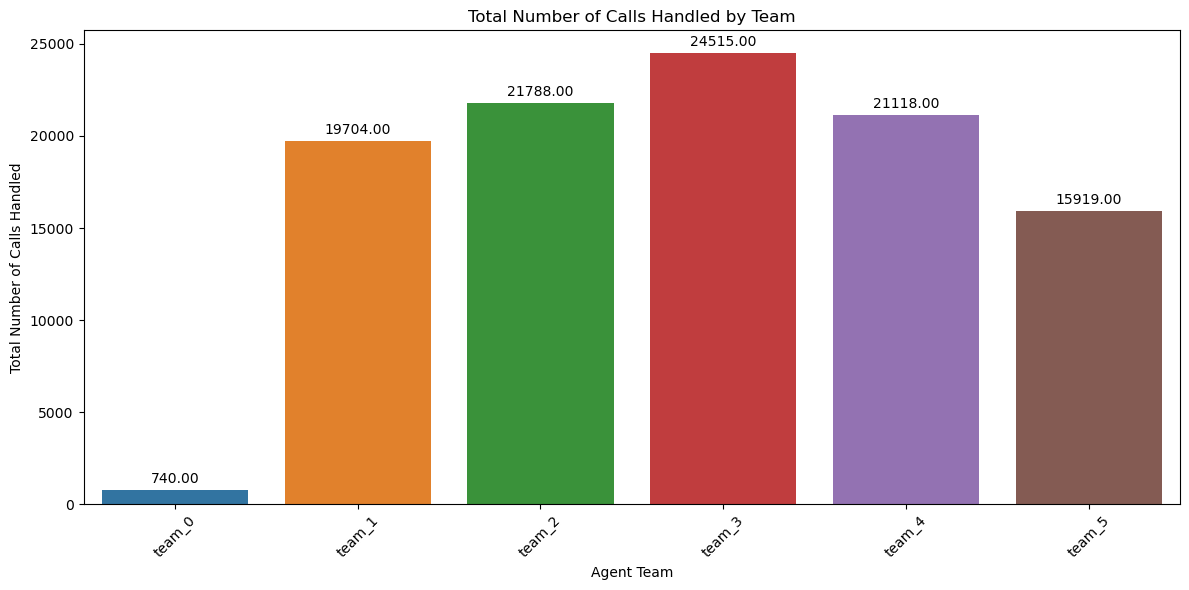

In [54]:
# Create a bar plot of Total Logged In Time by Team in days
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Agent Team', y='Number of Calls Handled', data=team_handled_calls)
plt.title('Total Number of Calls Handled by Team')
plt.xlabel('Agent Team')
plt.ylabel('Total Number of Calls Handled')
plt.xticks(rotation=45)

# Annotate each bar with its respective data
for p in ax.patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
    
plt.show()

In [55]:
# Group by 'Agent Team' and the week of the 'Date'
team_weekly_handled_calls = hcc_df2.groupby(['Agent Team', hcc_df2['Date'].dt.strftime('%U-%Y')])['Number of Calls Handled'].sum().reset_index()

# Rename the columns for clarity
team_weekly_handled_calls.columns = ['Agent Team', 'Week', 'Total Calls Handled']

# Sort the data by 'Agent Team' and 'Week'
team_weekly_handled_calls = team_weekly_handled_calls.sort_values(by=['Agent Team', 'Week'])

# Remove the first character from the 'Week' column
team_weekly_handled_calls['Week'] = team_weekly_handled_calls['Week'].str[1:]

team_weekly_handled_calls.reset_index()

index Agent Team    Week  Total Calls Handled
0       0     team_0  1-2022                  217
1       1     team_0  2-2022                  168
2       2     team_0  3-2022                  355
3       3     team_0  4-2022                    0
4       4     team_1  1-2022                 4742
5       5     team_1  2-2022                 4889
6       6     team_1  3-2022                 5113
7       7     team_1  4-2022                 4960
8       8     team_2  1-2022                 5592
9       9     team_2  2-2022                 5064
10     10     team_2  3-2022                 5356
11     11     team_2  4-2022                 5776
12     12     team_3  1-2022                 5091
13     13     team_3  2-2022                 6687
14     14     team_3  3-2022                 6021
15     15     team_3  4-2022                 6716
16     16     team_4  1-2022                 5549
17     17     team_4  2-2022                 4989
18     18     team_4  3-2022                 4642
19     19     team_4  4-2022                 5938
20     20     team_5  1-2022                 4212
21     21     team_5  2-2022                 4088
22     22     team_5  3-2022                 3544
23     23     team_5  4-2022                 4075

In [56]:
team_weekly_handled_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Agent Team           24 non-null     object
 1   Week                 24 non-null     object
 2   Total Calls Handled  24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 768.0+ bytes


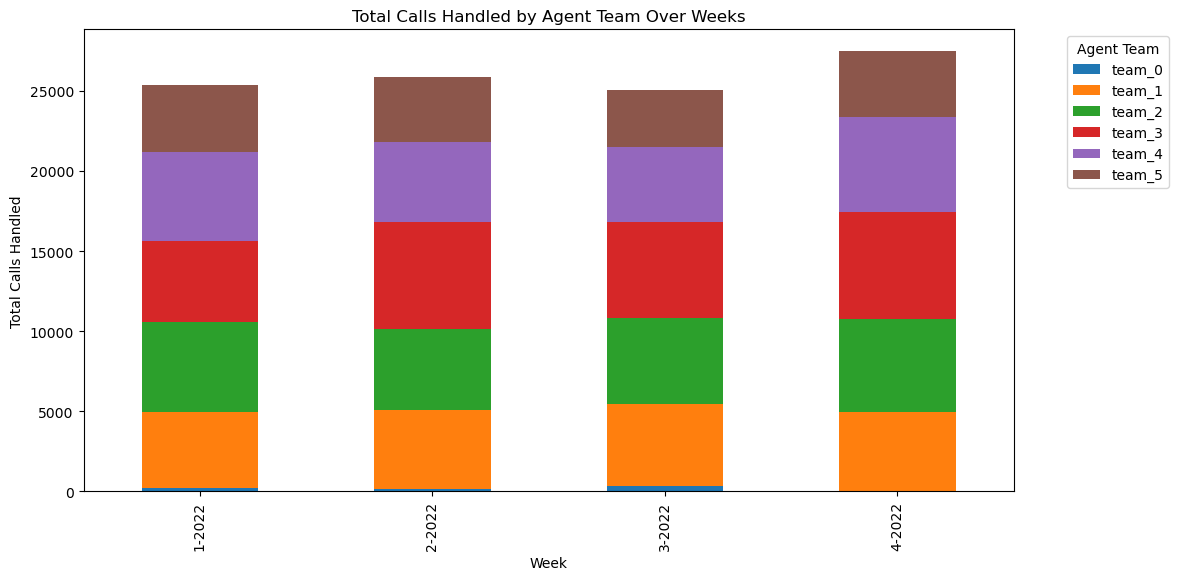

In [57]:
# Pivot the DataFrame to prepare it for a stacked bar chart
pivot_df = team_weekly_handled_calls.pivot(index='Week', columns='Agent Team', values='Total Calls Handled')

# Create a stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Total Calls Handled')
plt.title('Total Calls Handled by Agent Team Over Weeks')

# Show the legend
plt.legend(title='Agent Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()

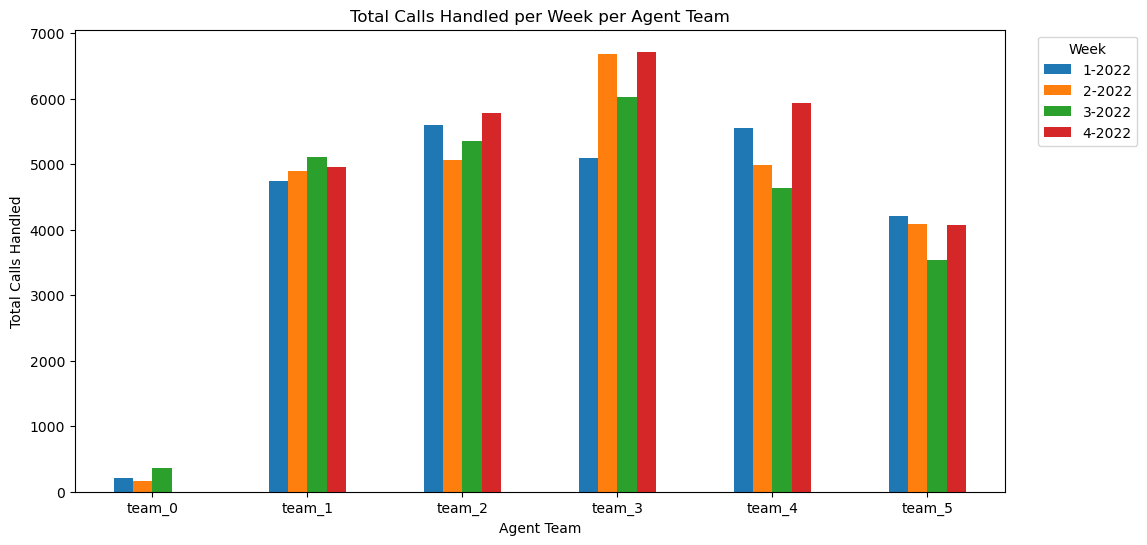

In [58]:
# Create a pivot table to reshape the data for plotting
pivot_table = team_weekly_handled_calls.pivot(index='Agent Team', columns='Week', values='Total Calls Handled')

# Plot the data as a bar chart
ax = pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Total Calls Handled per Week per Agent Team')
plt.xlabel('Agent Team')
plt.ylabel('Total Calls Handled')
plt.legend(title='Week', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()

<a name="section2c"></a>

### c) By Agent:

In [59]:
agent_sorted = hcc_df.groupby(['Agent ID'])[time_related_columns].sum().reset_index()
agent_sorted

Agent ID Total Logged In Time  Not Ready Time      Ready Time  \
0    Agent 1      6 days 15:33:03 0 days 23:27:09 0 days 11:27:15   
1   Agent 10      3 days 10:20:55 0 days 07:05:56 1 days 11:21:54   
2   Agent 11      3 days 12:03:39 0 days 17:56:24 0 days 05:30:23   
3   Agent 12      3 days 21:27:28 0 days 06:01:56 0 days 06:46:27   
4   Agent 13      3 days 14:33:26 0 days 12:52:46 0 days 21:41:38   
..       ...                  ...             ...             ...   
92  Agent 93      0 days 16:19:24 0 days 03:32:43 0 days 02:21:59   
93  Agent 94      0 days 14:20:04 0 days 01:26:29 0 days 06:17:13   
94  Agent 95      2 days 10:31:16 0 days 09:37:32 0 days 20:53:14   
95  Agent 96      1 days 04:51:38 0 days 04:05:40 0 days 13:07:34   
96  Agent 97      1 days 16:57:17 0 days 06:48:41 0 days 16:50:43   

     Reserved Time       Talk Time Next Call Prep Time           Break  \
0  0 days 01:58:01 4 days 19:53:35     0 days 06:47:03 0 days 04:16:51   
1  0 days 01:19:18 1 days 10:15:09     0 days 04:18:38 0 days 02:56:14   
2  0 days 00:42:36 2 days 09:35:14     0 days 02:19:02 0 days 02:05:22   
3  0 days 01:19:14 3 days 02:36:32     0 days 04:43:19 0 days 02:04:31   
4  0 days 00:46:19 1 days 23:39:18     0 days 03:33:25 0 days 01:50:43   
..             ...             ...                 ...             ...   
92 0 days 00:07:22 0 days 09:40:56     0 days 00:36:24 0 days 00:15:16   
93 0 days 00:17:45 0 days 05:45:26     0 days 00:33:11 0 days 00:21:09   
94 0 days 00:37:54 1 days 01:26:33     0 days 01:56:03 0 days 01:53:09   
95 0 days 00:26:25 0 days 10:20:09     0 days 00:51:50 0 days 00:43:20   
96 0 days 00:41:40 0 days 14:58:08     0 days 01:38:05 0 days 02:14:12   

             Lunch    Team Support         Meeting After Call Work  \
0  0 days 09:00:44 0 days 00:00:00 0 days 00:28:08 0 days 06:40:34   
1  0 days 04:01:06 0 days 00:00:00 0 days 00:00:00 0 days 00:00:26   
2  0 days 04:00:52 0 days 00:00:00 0 days 02:22:34 0 days 09:00:47   
3  0 days 00:29:05 0 days 00:17:33 0 days 00:03:10 0 days 02:01:24   
4  0 days 04:03:32 0 days 00:00:25 0 days 00:48:54 0 days 02:04:34   
..             ...             ...             ...             ...   
92 0 days 00:30:57 0 days 00:00:00 0 days 00:00:00 0 days 01:51:44   
93 0 days 00:34:18 0 days 00:00:00 0 days 00:00:00 0 days 00:00:00   
94 0 days 03:23:03 0 days 00:01:08 0 days 00:01:01 0 days 00:00:00   
95 0 days 00:59:13 0 days 00:00:00 0 days 00:00:00 0 days 00:00:00   
96 0 days 01:28:30 0 days 00:00:00 0 days 00:00:00 0 days 00:00:00   

   Special Projects        Training   System Issues           Other  
0   0 days 01:30:26 0 days 01:09:44 0 days 00:13:20 0 days 00:07:22  
1   0 days 00:00:00 0 days 00:00:00 0 days 00:02:53 0 days 00:05:17  
2   0 days 00:00:00 0 days 00:22:24 0 days 00:00:00 0 days 00:04:25  
3   0 days 00:43:13 0 days 00:06:55 0 days 00:00:00 0 days 00:16:05  
4   0 days 00:00:00 0 days 03:40:08 0 days 00:00:00 0 days 00:24:30  
..              ...             ...             ...             ...  
92  0 days 00:00:00 0 days 00:48:21 0 days 00:00:05 0 days 00:06:20  
93  0 days 00:00:00 0 days 00:16:07 0 days 00:00:17 0 days 00:14:38  
94  0 days 00:00:00 0 days 04:07:56 0 days 00:03:27 0 days 00:07:48  
95  0 days 00:00:00 0 days 01:08:06 0 days 00:00:00 0 days 01:15:01  
96  0 days 00:00:00 0 days 02:26:05 0 days 00:03:12 0 days 00:36:42  

[97 rows x 16 columns]

In [60]:
agent_sorted.describe()

Total Logged In Time             Not Ready Time  \
count                         97                         97   
mean   4 days 01:31:37.360824742  0 days 15:32:35.597938144   
std    1 days 18:10:18.923891820  0 days 09:13:50.914340245   
min              0 days 01:50:37            0 days 00:05:11   
25%              3 days 01:20:07            0 days 08:52:32   
50%              3 days 21:27:28            0 days 14:48:45   
75%              5 days 13:54:33            0 days 19:59:59   
max              7 days 02:55:44            2 days 00:44:19   

                      Ready Time              Reserved Time  \
count                         97                         97   
mean   0 days 09:35:54.793814432  0 days 01:14:00.072164948   
std    0 days 10:01:11.383552252  0 days 00:39:56.581829082   
min              0 days 00:21:53            0 days 00:02:05   
25%              0 days 03:08:47            0 days 00:44:23   
50%              0 days 06:17:13            0 days 01:09:36   
75%              0 days 12:17:01            0 days 01:37:22   
max              2 days 10:07:26            0 days 02:54:20   

                       Talk Time        Next Call Prep Time  \
count                         97                         97   
mean   2 days 18:24:50.701030927  0 days 04:44:16.195876288   
std    1 days 07:54:36.092407044  0 days 02:51:00.754656334   
min              0 days 00:34:31            0 days 00:06:20   
25%              1 days 22:39:40            0 days 02:46:49   
50%              2 days 17:52:03            0 days 04:11:59   
75%              3 days 17:22:45            0 days 06:04:05   
max              5 days 10:53:50            0 days 12:35:03   

                           Break                      Lunch  \
count                         97                         97   
mean   0 days 02:48:51.154639175  0 days 04:19:42.948453608   
std    0 days 02:05:54.771206744  0 days 03:13:09.557273657   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 01:29:00            0 days 01:28:30   
50%              0 days 02:28:51            0 days 04:01:05   
75%              0 days 03:50:19            0 days 07:06:24   
max              0 days 14:10:11            0 days 09:54:22   

                    Team Support                    Meeting  \
count                         97                         97   
mean   0 days 00:02:43.381443298  0 days 00:27:53.855670103   
std    0 days 00:11:19.561262312  0 days 00:42:57.453066941   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:00:00            0 days 00:00:00   
50%              0 days 00:00:00            0 days 00:10:22   
75%              0 days 00:00:03            0 days 00:35:05   
max              0 days 01:43:11            0 days 03:22:35   

                 After Call Work           Special Projects  \
count                         97                         97   
mean   0 days 04:25:28.298969072  0 days 00:28:59.432989690   
std    0 days 04:27:08.830119613  0 days 01:00:13.213648965   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 01:31:39            0 days 00:00:00   
50%              0 days 03:00:45            0 days 00:00:00   
75%              0 days 06:18:16            0 days 00:16:48   
max              1 days 02:17:17            0 days 04:41:22   

                        Training              System Issues  \
count                         97                         97   
mean   0 days 02:09:38.051546391  0 days 00:09:28.927835051   
std    0 days 02:46:17.749854228  0 days 00:22:02.217867254   
min              0 days 00:00:00            0 days 00:00:00   
25%              0 days 00:16:07            0 days 00:00:00   
50%              0 days 01:09:07            0 days 00:02:49   
75%              0 days 02:51:24            0 days 00:12:16   
max              0 days 16:48:18            0 days 03:09:09   

                           Other  
c

In [61]:
total_performance = sheet3.groupby(['Agent ID']).sum(numeric_only=True)
total_performance.reset_index(inplace=True)
total_performance

Agent ID  Number of Calls Handled
0    Agent 1                     1696
1   Agent 10                     1547
2   Agent 11                      608
3   Agent 12                     1209
4   Agent 13                      702
..       ...                      ...
92  Agent 93                      126
93  Agent 94                      201
94  Agent 95                      520
95  Agent 96                      284
96  Agent 97                      525

[97 rows x 2 columns]

In [62]:
# Assuming your data is in a DataFrame called df
mean_calls = total_performance['Number of Calls Handled'].mean()
median_calls = total_performance['Number of Calls Handled'].median()
min_calls = total_performance['Number of Calls Handled'].min()
max_calls = total_performance['Number of Calls Handled'].max()

print(f"Mean Calls Handled: {mean_calls}")
print(f"Median Calls Handled: {median_calls}")
print(f"Minimum Calls Handled: {min_calls}")
print(f"Maximum Calls Handled: {max_calls}")

Mean Calls Handled: 1069.9381443298969
Median Calls Handled: 968.0
Minimum Calls Handled: 38
Maximum Calls Handled: 2632


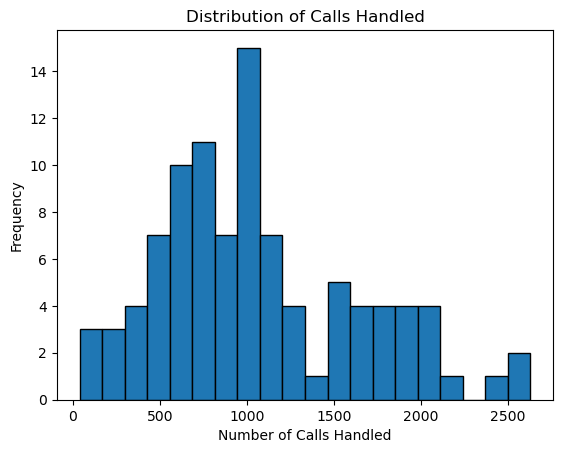

In [63]:
# Create a histogram
plt.hist(total_performance['Number of Calls Handled'], bins=20, edgecolor='k')
plt.xlabel('Number of Calls Handled')
plt.ylabel('Frequency')
plt.title('Distribution of Calls Handled')
plt.show()

In [64]:
top_agents = total_performance.nlargest(5, 'Number of Calls Handled')
top_agents.reset_index()

index  Agent ID  Number of Calls Handled
0     24  Agent 31                     2632
1     50  Agent 55                     2594
2     12  Agent 20                     2409
3     29  Agent 36                     2167
4     11   Agent 2                     2069

In [65]:
bottom_agents = total_performance.nsmallest(5, 'Number of Calls Handled')
bottom_agents.reset_index()

index  Agent ID  Number of Calls Handled
0     79  Agent 81                       38
1     37  Agent 43                      102
2     92  Agent 93                      126
3      6  Agent 15                      189
4     93  Agent 94                      201

<a name="section2d"></a>

### d) Staffing Plan:

In [66]:
daily_metrics2 = daily_metrics.copy()
daily_metrics2['Day of Week'] = daily_metrics2['Date'].dt.strftime('%A')

# Calculate the number of FTEs (assuming a 40-hour workweek)
daily_metrics2['FTEs'] = (daily_metrics2['Utilization Rate'] * 40) / 60  # 60 minutes per hour

# Print the weekly metrics
daily_metrics2.reset_index()
daily_metrics2

Date  Agent ID  Agent Team  Total Logged In Time  Talk Time  \
0  2022-08-01        72           6             22.497778  16.891944   
1  2022-08-02        70           6             18.478287  13.524988   
2  2022-08-03        76           6             21.292801  13.740868   
3  2022-08-04        73           6             19.299444  12.501030   
4  2022-08-05        65           6             17.548275  10.786806   
5  2022-08-06         0           0              0.000000   0.000000   
6  2022-08-07         0           0              0.000000   0.000000   
7  2022-08-08        76           6             25.178576  17.300139   
8  2022-08-09        74           6             21.129942  13.998750   
9  2022-08-10        74           6             20.431238  12.692361   
10 2022-08-11        70           6             18.688819  12.156539   
11 2022-08-12        60           5             16.096632  10.913530   
12 2022-08-13         0           0              0.000000   0.000000   
13 2022-08-14         0           0              0.000000   0.000000   
14 2022-08-15        66           6             20.715914  15.470359   
15 2022-08-16        67           6             19.318831  13.662639   
16 2022-08-17        67           6             18.630799  12.926655   
17 2022-08-18        71           6             19.512106  12.465220   
18 2022-08-19        63           6             17.587118  11.214699   
19 2022-08-20         0           0              0.000000   0.000000   
20 2022-08-21         0           0              0.000000   0.000000   
21 2022-08-22        77           5             25.329861  17.434664   
22 2022-08-23        70           5             20.517870  14.519931   
23 2022-08-24        69           5             18.978657  13.161956   
24 2022-08-25        64           5             17.072141  12.220648   
25 2022-08-26        60           5             15.866713  10.839861   

    Reserved Time  Ready Time  Not Ready Time  Utilization Rate  \
0        0.266319    0.638623        3.631736          0.791051   
1        0.259549    1.044062        2.724259          0.802488   
2        0.276806    2.852882        3.432037          0.792313   
3        0.248403    2.086516        3.550139          0.768724   
4        0.211725    2.886794        2.861366          0.791264   
5        0.000000    0.000000        0.000000               NaN   
6        0.000000    0.000000        0.000000               NaN   
7        0.302558    2.840532        3.557419          0.811930   
8        0.270428    2.601551        3.217431          0.798428   
9        0.262870    2.879653        3.633553          0.775033   
10       0.224375    2.393310        3.045046          0.790538   
11       0.200440    1.614734        2.574722          0.790768   
12       0.000000    0.000000        0.000000               NaN   
13       0.000000    0.000000        0.000000               NaN   
14       0.254618    0.877454        3.094780          0.801434   
15       0.255833    1.322859        3.104005          0.788937   
16       0.244352    1.701910        2.826736          0.798297   
17       0.239815    2.568322        3.325787          0.782763   
18       0.218519    2.565370        2.779502          0.795957   
19       0.000000    0.000000        0.000000               NaN   
20       0.000000    0.000000        0.000000               NaN   
21       0.336597    2.388032        3.897743          0.795871   
22       0.263889    1.293368        3.374757          0.783570   
23       0.247176    1.527650        3.043877          0.787031   
24       0.209502    1.155058        2.637894          0.795753   
25       0.191030    1.555475        2.507731          0.793256   

    Non-Utilized Rate Day of Week      FTEs  
0            0.161426      Monday  0.527367  
1            0.147430     Tuesday  0.534992  
2            0.161183   Wednesday  0.528208  
3            0.183950    Thursday  0.512483  
4            0.163057   

In [67]:
fte_mean_by_day = daily_metrics2.groupby('Day of Week')['FTEs'].mean().reset_index()

# Create a custom sorting order for the days of the week
custom_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert the "Day of Week" column to a categorical data type with the custom sorting order
fte_mean_by_day["Day of Week"] = pd.Categorical(fte_mean_by_day["Day of Week"], categories=custom_order, ordered=True)

# Sort the DataFrame by the custom order
fte_mean_by_day = fte_mean_by_day.sort_values(by="Day of Week")

# Reset the index if needed
fte_mean_by_day.reset_index(drop=True, inplace=True)

fte_mean_by_day

Day of Week      FTEs
0      Monday  0.533381
1     Tuesday  0.528904
2   Wednesday  0.525446
3    Thursday  0.522963
4      Friday  0.528541
5    Saturday       NaN
6      Sunday       NaN

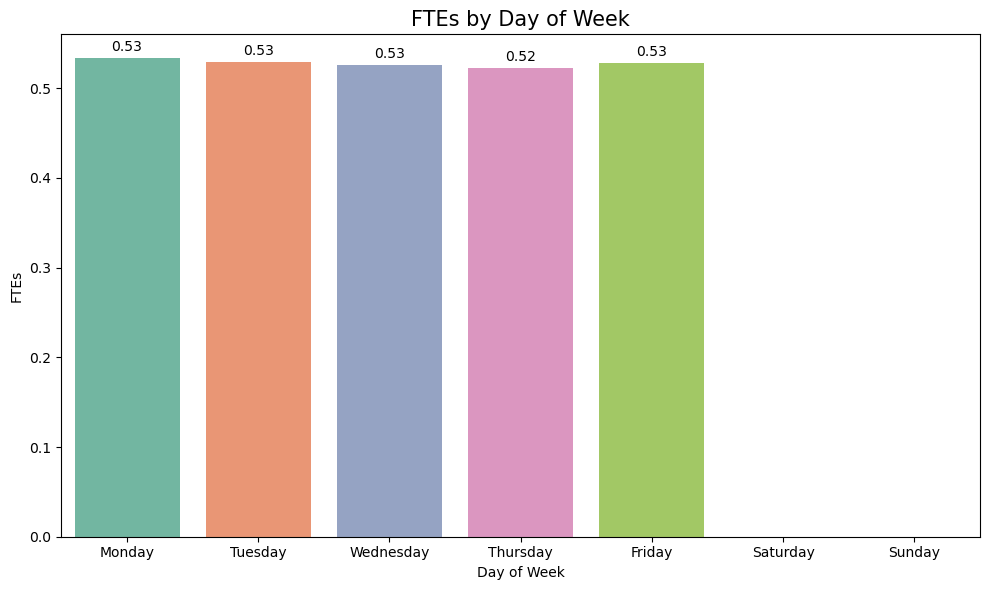

In [68]:
# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day of Week', y='FTEs', data=fte_mean_by_day,palette='Set2')
plt.title('FTEs by Day of Week',fontsize=15)
plt.xlabel('Day of Week')
plt.ylabel('FTEs')

# Annotate each bar with its respective productivity score
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

[Jump to Table of Contents](#table-of-contents)

[Jump to Section 1: Data Preprocessing](#section1)

[Jump to Section 3: Productivity Model](#section3)

[Jump to Section 4: Productivity Dashboard](#section4)

<a name="section3"></a>
## 3 - Define a model for productivity using the provided variables: 

Defining a model for productivity in a call center context typically involves using key performance metrics to assess how efficiently agents and teams are handling calls. In this case, you can consider a simple model for productivity by combining metrics like utilization rate, efficiency (average handle time), and the number of handled calls. 

Model for Productivity:

**Utilization Rate (UR)**: This measures the percentage of time agents are actively engaged in productive tasks (e.g., taking calls). Higher utilization rates generally indicate better productivity.

**Efficiency (EFF)**: Efficiency is often measured by the average handle time (AHT) per call. Lower AHT suggests more efficient call handling.

**Number of Handled Calls (NHC)**: The total number of calls handled by an agent or team can also be an indicator of productivity.

To create a composite productivity score, we can use a weighted combination of these metrics based on their relative importance to the call center's goals. For example:

Productivity Score (PS) = w1 * UR + w2 * (1 - EFF) + w3 * NHC

Where:

w1, w2, w3 are weights assigned to each metric, reflecting their importance. These weights can be adjusted based on the call center's priorities.

In [69]:
# Define a function to calculate efficiency
def calculate_efficiency(copied_df2):
    efficiency = copied_df2['Talk Time'] / copied_df2['Total Logged In Time']
    return efficiency

In [70]:
copied_df2 = copied_df.copy()

In [71]:
# Calculate utilization rate and non-utilized time
copied_df2['Utilization Rate'] = calculate_utilization_rate(copied_df2)
copied_df2['Non-Utilized Rate'] = calculate_non_utilized_rate(copied_df2)
copied_df2['Efficiency'] = calculate_efficiency(copied_df2)

In [72]:
copied_df2.head()

Agent ID Agent Team       Date Interval Start Time   Interval End Time  \
0  Agent 1     team_1 2022-08-01 2022-08-01 08:00:00 2022-08-01 08:30:00   
1  Agent 1     team_1 2022-08-01 2022-08-01 08:30:00 2022-08-01 09:00:00   
2  Agent 1     team_1 2022-08-01 2022-08-01 09:00:00 2022-08-01 09:30:00   
3  Agent 1     team_1 2022-08-01 2022-08-01 09:30:00 2022-08-01 10:00:00   
4  Agent 1     team_1 2022-08-01 2022-08-01 10:00:00 2022-08-01 10:30:00   

   Total Logged In Time  Not Ready Time  Ready Time  Reserved Time  Talk Time  \
0              0.018773        0.002384    0.000081       0.000255   0.015174   
1              0.020833        0.001076    0.001296       0.000382   0.017002   
2              0.020833        0.002963    0.000000       0.000428   0.015984   
3              0.020833        0.004329    0.000000       0.000174   0.015544   
4              0.020833        0.001262    0.000000       0.000174   0.018715   

   ...  Team Support  Meeting  After Call Work  Special Projects  Training  \
0  ...           0.0      0.0         0.002350               0.0       0.0   
1  ...           0.0      0.0         0.001076               0.0       0.0   
2  ...           0.0      0.0         0.002951               0.0       0.0   
3  ...           0.0      0.0         0.000000               0.0       0.0   
4  ...           0.0      0.0         0.001262               0.0       0.0   

   System Issues     Other  Utilization Rate  Non-Utilized Rate  Efficiency  
0            0.0  0.000035          0.826141           0.127004    0.808261  
1            0.0  0.000000          0.896667           0.051667    0.816111  
2            0.0  0.000000          0.787778           0.142222    0.767222  
3            0.0  0.000000          0.754444           0.207778    0.746111  
4            0.0  0.000000          0.906667           0.060556    0.898333  

[5 rows x 23 columns]

<a name="section3a"></a>
### a) Productivity by team:

In [73]:
# Calculate team-level productivity
team_productivity = copied_df2.groupby('Agent Team')[['Efficiency', 'Utilization Rate', 'Non-Utilized Rate']].mean()

#  Display the team-level productivity metrics
team_productivity.reset_index()

Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate
0     team_0    0.541065          0.795201           0.163201
1     team_1    0.669305          0.760131           0.188256
2     team_2    0.657391          0.804826           0.146117
3     team_3    0.714895          0.779054           0.167481
4     team_4    0.660812          0.772761           0.181879
5     team_5    0.614152          0.740468           0.215216

In [74]:
# Merge team_productivity with team_handled_calls on 'Agent Team'
team_model = pd.merge(team_productivity, team_handled_calls, on=['Agent Team'])
team_model

Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
0     team_0    0.541065          0.795201           0.163201   
1     team_1    0.669305          0.760131           0.188256   
2     team_2    0.657391          0.804826           0.146117   
3     team_3    0.714895          0.779054           0.167481   
4     team_4    0.660812          0.772761           0.181879   
5     team_5    0.614152          0.740468           0.215216   

   Number of Calls Handled  
0                      740  
1                    19704  
2                    21788  
3                    24515  
4                    21118  
5                    15919

In [75]:
# Define weights for each metric (you can adjust these)
w1 = 0.4
w2 = 0.3
w3 = 0.3

# Calculate the productivity score (PS)
team_model['Productivity Score'] = w1 * team_model['Utilization Rate'] + w2 * (1 - team_model['Efficiency']) + w3 * team_model['Number of Calls Handled']

# Sort the data by productivity score to identify top-performing and low-performing agents/teams
team_sorted_data = team_model.sort_values(by='Productivity Score', ascending=False)

team_sorted_data

Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
3     team_3    0.714895          0.779054           0.167481   
2     team_2    0.657391          0.804826           0.146117   
4     team_4    0.660812          0.772761           0.181879   
1     team_1    0.669305          0.760131           0.188256   
5     team_5    0.614152          0.740468           0.215216   
0     team_0    0.541065          0.795201           0.163201   

   Number of Calls Handled  Productivity Score  
3                    24515         7354.897153  
2                    21788         6536.824713  
4                    21118         6335.810861  
1                    19704         5911.603261  
5                    15919         4776.111942  
0                      740          222.455761

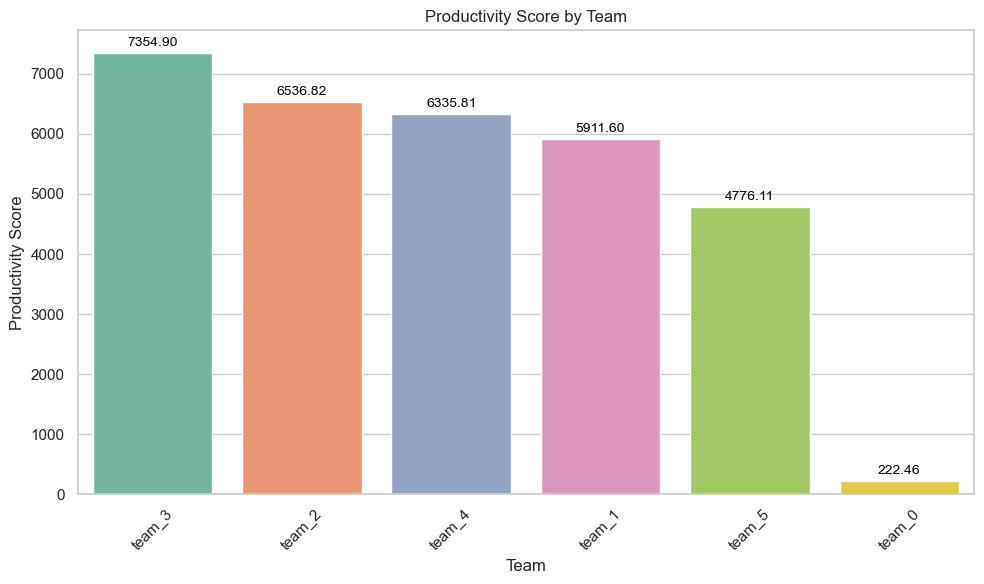

In [76]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")  
sns.set_palette("pastel")   

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent Team', y='Productivity Score', data=team_sorted_data, palette="Set2")
plt.xlabel('Team')
plt.ylabel('Productivity Score')
plt.title('Productivity Score by Team')
plt.xticks(rotation=45)

# Annotate each bar with its respective productivity score
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

<a name="section3a1"></a>
### a1) Productivity by team dashboard:

In [77]:
# Create a figure for the dashboard
fig = go.Figure()

# Add a bar chart for Efficiency
fig.add_trace(go.Bar(
    x=team_model['Agent Team'],
    y=team_model['Efficiency'],
    name='Efficiency',
    marker_color='royalblue'
))

# Add a bar chart for Utilization Rate
fig.add_trace(go.Bar(
    x=team_model['Agent Team'],
    y=team_model['Utilization Rate'],
    name='Utilization Rate',
    marker_color='limegreen'
))

# Add a bar chart for Non-Utilization Rate
fig.add_trace(go.Bar(
    x=team_model['Agent Team'],
    y=team_model['Non-Utilized Rate'],
    name='Non-Utilization Rate',
    marker_color='tomato'
))

# Add a line chart for Number of Calls Handled
fig.add_trace(go.Scatter(
    x=team_model['Agent Team'],
    y=team_model['Number of Calls Handled'],
    name='Number of Calls Handled',
    mode='lines+markers',
    yaxis='y2',  # Use a secondary y-axis for this
    line=dict(color='purple', width=2)
))

# Define layout for the dashboard
fig.update_layout(
    title='Call Center Productivity Dashboard',
    xaxis=dict(title='Agent Team'),
    yaxis=dict(title='Metrics', titlefont=dict(color='black')),
    yaxis2=dict(title='Number of Calls Handled', titlefont=dict(color='black'), overlaying='y', side='right'),
    barmode='group',  # Group bars for efficiency, utilization rate, and non-utilization rate
    legend=dict(x=0.7, y=1),
    height=600
)

# Add interactive capabilities like hovering over data points
fig.update_traces(hoverinfo='x+y')

# Show the dashboard
fig.show()

<a name="section3a2"></a>
### a2) Productivity by team dashboard by Week:

In [78]:
# Calculate team-level productivity
team_productivity2 = copied_df2.groupby(['Agent Team', copied_df2['Date'].dt.strftime('%U-%Y')])[['Efficiency', 'Utilization Rate', 'Non-Utilized Rate']].mean().reset_index()

# Rename the 'Week' column
team_productivity2 = team_productivity2.rename(columns={'Date': 'Week'})

# Remove the first character from the 'Week' column
team_productivity2['Week'] = team_productivity2['Week'].str[1:]

# Display the team-level productivity metrics
team_productivity2.reset_index()

index Agent Team    Week  Efficiency  Utilization Rate  Non-Utilized Rate
0       0     team_0  1-2022    0.507913          0.741335           0.221776
1       1     team_0  2-2022    0.443652          0.757487           0.207552
2       2     team_0  3-2022    0.631269          0.860384           0.090065
3       3     team_1  1-2022    0.678400          0.754960           0.194882
4       4     team_1  2-2022    0.626941          0.758971           0.190856
5       5     team_1  3-2022    0.681052          0.773890           0.172329
6       6     team_1  4-2022    0.691941          0.752789           0.194813
7       7     team_2  1-2022    0.663027          0.818042           0.131895
8       8     team_2  2-2022    0.624935          0.805327           0.148386
9       9     team_2  3-2022    0.645016          0.790971           0.161665
10     10     team_2  4-2022    0.697684          0.804525           0.142879
11     11     team_3  1-2022    0.732942          0.772688           0.173584
12     12     team_3  2-2022    0.733684          0.787440           0.154493
13     13     team_3  3-2022    0.716085          0.780422           0.166203
14     14     team_3  4-2022    0.682137          0.775098           0.175847
15     15     team_4  1-2022    0.640802          0.755209           0.202320
16     16     team_4  2-2022    0.650691          0.784647           0.170366
17     17     team_4  3-2022    0.671755          0.766459           0.189110
18     18     team_4  4-2022    0.683204          0.786106           0.164049
19     19     team_5  1-2022    0.611765          0.735289           0.221305
20     20     team_5  2-2022    0.577980          0.731382           0.228279
21     21     team_5  3-2022    0.629172          0.752116           0.203249
22     22     team_5  4-2022    0.645941          0.746068           0.204088

<a name="section3b"></a>
### b) Productivity by agent:

In [79]:
# Calculate agent-level productivity
agent_productivity = copied_df2.groupby(['Agent ID','Agent Team'])[['Efficiency', 'Utilization Rate', 'Non-Utilized Rate']].mean()

# Display the agent-level productivity metrics
agent_productivity.reset_index(inplace=True)
agent_productivity

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate
0    Agent 1     team_1    0.723987          0.808010           0.148564
1   Agent 10     team_4    0.401055          0.826329           0.122138
2   Agent 11     team_4    0.687236          0.759750           0.211629
3   Agent 12     team_2    0.751821          0.829167           0.120584
4   Agent 13     team_0    0.548810          0.793844           0.164659
..       ...        ...         ...               ...                ...
92  Agent 93     team_4    0.584128          0.736218           0.225475
93  Agent 94     team_3    0.391485          0.854785           0.105329
94  Agent 95     team_3    0.432688          0.793343           0.173640
95  Agent 96     team_2    0.332503          0.774287           0.197326
96  Agent 97     team_3    0.376880          0.795153           0.163986

[97 rows x 5 columns]

In [80]:
# Merge agent_productivity with total_performance on 'Agent ID'
agent_model = pd.merge(agent_productivity, total_performance, on=['Agent ID'])
agent_model

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
0    Agent 1     team_1    0.723987          0.808010           0.148564   
1   Agent 10     team_4    0.401055          0.826329           0.122138   
2   Agent 11     team_4    0.687236          0.759750           0.211629   
3   Agent 12     team_2    0.751821          0.829167           0.120584   
4   Agent 13     team_0    0.548810          0.793844           0.164659   
..       ...        ...         ...               ...                ...   
92  Agent 93     team_4    0.584128          0.736218           0.225475   
93  Agent 94     team_3    0.391485          0.854785           0.105329   
94  Agent 95     team_3    0.432688          0.793343           0.173640   
95  Agent 96     team_2    0.332503          0.774287           0.197326   
96  Agent 97     team_3    0.376880          0.795153           0.163986   

    Number of Calls Handled  
0                      1696  
1                      1547  
2                       608  
3                      1209  
4                       702  
..                      ...  
92                      126  
93                      201  
94                      520  
95                      284  
96                      525  

[97 rows x 6 columns]

In [81]:
# Define weights for each metric (you can adjust these)
w1 = 0.4
w2 = 0.3
w3 = 0.3

# Calculate the productivity score (PS)
agent_model['Productivity Score'] = w1 * agent_model['Utilization Rate'] + w2 * (1 - agent_model['Efficiency']) + w3 * agent_model['Number of Calls Handled']

# Sort the data by productivity score to identify top-performing and low-performing agents/teams
agent_sorted_data = agent_model.sort_values(by='Productivity Score', ascending=False)

agent_sorted_data

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
24  Agent 31     team_2    0.701059          0.792421           0.145182   
50  Agent 55     team_3    0.730204          0.750964           0.176208   
12  Agent 20     team_2    0.673734          0.771363           0.160972   
29  Agent 36     team_4    0.620405          0.812553           0.125120   
11   Agent 2     team_3    0.632228          0.657759           0.287839   
..       ...        ...         ...               ...                ...   
93  Agent 94     team_3    0.391485          0.854785           0.105329   
6   Agent 15     team_3    0.708972          0.752618           0.181351   
92  Agent 93     team_4    0.584128          0.736218           0.225475   
37  Agent 43     team_4    0.587481          0.623204           0.363461   
79  Agent 81     team_0    0.249877          0.846207           0.108362   

    Number of Calls Handled  Productivity Score  
24                     2632          790.006651  
50                     2594          778.581324  
12                     2409          723.106425  
29                     2167          650.538900  
11                     2069          621.073435  
..                      ...                 ...  
93                      201           60.824469  
6                       189           57.088355  
92                      126           38.219249  
37                      102           30.973037  
79                       38           11.963520  

[97 rows x 7 columns]

In [82]:
#Top 5 agents have highest PS
agent_sorted_data.nlargest(5, 'Productivity Score')

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
24  Agent 31     team_2    0.701059          0.792421           0.145182   
50  Agent 55     team_3    0.730204          0.750964           0.176208   
12  Agent 20     team_2    0.673734          0.771363           0.160972   
29  Agent 36     team_4    0.620405          0.812553           0.125120   
11   Agent 2     team_3    0.632228          0.657759           0.287839   

    Number of Calls Handled  Productivity Score  
24                     2632          790.006651  
50                     2594          778.581324  
12                     2409          723.106425  
29                     2167          650.538900  
11                     2069          621.073435

In [83]:
#Top 5 agents have lowest PS
agent_sorted_data.nsmallest(5, 'Productivity Score')

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
79  Agent 81     team_0    0.249877          0.846207           0.108362   
37  Agent 43     team_4    0.587481          0.623204           0.363461   
92  Agent 93     team_4    0.584128          0.736218           0.225475   
6   Agent 15     team_3    0.708972          0.752618           0.181351   
93  Agent 94     team_3    0.391485          0.854785           0.105329   

    Number of Calls Handled  Productivity Score  
79                       38           11.963520  
37                      102           30.973037  
92                      126           38.219249  
6                       189           57.088355  
93                      201           60.824469

<a name="section3b1"></a>
### b1) Productivity by agent dashboard:

In [84]:
# Extract the numerical part of 'Agent ID' and convert it to integers
agent_model['Agent ID Numeric'] = agent_model['Agent ID'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by 'Agent ID Numeric' and 'Week'
df_sorted1 = agent_model.sort_values(by=['Agent ID Numeric'])

# Drop the 'Agent ID Numeric' column if you don't need it anymore
df_sorted1 = df_sorted1.drop(columns=['Agent ID Numeric'])

# Reset the index after sorting
df_sorted1.reset_index(drop=True)

Agent ID Agent Team  Efficiency  Utilization Rate  Non-Utilized Rate  \
0    Agent 1     team_1    0.723987          0.808010           0.148564   
1    Agent 2     team_3    0.632228          0.657759           0.287839   
2    Agent 3     team_3    0.771184          0.796351           0.187739   
3    Agent 4     team_4    0.653282          0.747824           0.196428   
4    Agent 5     team_4    0.791097          0.835344           0.123427   
..       ...        ...         ...               ...                ...   
92  Agent 93     team_4    0.584128          0.736218           0.225475   
93  Agent 94     team_3    0.391485          0.854785           0.105329   
94  Agent 95     team_3    0.432688          0.793343           0.173640   
95  Agent 96     team_2    0.332503          0.774287           0.197326   
96  Agent 97     team_3    0.376880          0.795153           0.163986   

    Number of Calls Handled  Productivity Score  
0                      1696          509.206008  
1                      2069          621.073435  
2                      1591          477.687185  
3                      1987          596.503145  
4                      1469          441.096808  
..                      ...                 ...  
92                      126           38.219249  
93                      201           60.824469  
94                      520          156.487531  
95                      284           85.709964  
96                      525          158.004997  

[97 rows x 7 columns]

In [85]:
# Create a figure for the dashboard
fig = go.Figure()

# Add a bar chart for Efficiency
fig.add_trace(go.Bar(
    x=df_sorted1['Agent ID'],
    y=df_sorted1['Efficiency'],
    name='Efficiency',
    marker_color='royalblue'
))

# Add a bar chart for Utilization Rate
fig.add_trace(go.Bar(
    x=df_sorted1['Agent ID'],
    y=df_sorted1['Utilization Rate'],
    name='Utilization Rate',
    marker_color='limegreen'
))

# Add a bar chart for Non-Utilization Rate
fig.add_trace(go.Bar(
    x=df_sorted1['Agent ID'],
    y=df_sorted1['Non-Utilized Rate'],
    name='Non-Utilization Rate',
    marker_color='tomato'
))

# Add a line chart for Number of Calls Handled
fig.add_trace(go.Scatter(
    x=df_sorted1['Agent ID'],
    y=df_sorted1['Number of Calls Handled'],
    name='Number of Calls Handled',
    mode='lines+markers',
    yaxis='y2',  # Use a secondary y-axis for this
    line=dict(color='purple', width=2)
))

# Define layout for the dashboard
fig.update_layout(
    title='Call Center Productivity Dashboard',
    xaxis=dict(title='Agent ID'),
    yaxis=dict(title='Metrics', titlefont=dict(color='black')),
    yaxis2=dict(title='Number of Calls Handled', titlefont=dict(color='black'), overlaying='y', side='right'),
    barmode='group',  # Group bars for efficiency, utilization rate, and non-utilization rate
    legend=dict(x=0.7, y=1),
    height=600
)

# Add interactive capabilities like hovering over data points
fig.update_traces(hoverinfo='x+y')

# Show the dashboard
fig.show()

<a name="section3b2"></a>
### b2) Productivity by agent by Week dashboard:

In [86]:
# Group and calculate the mean values
agent_productivity2 = copied_df2.groupby(['Agent ID', copied_df2['Date'].dt.strftime('%U-%Y')])[['Efficiency', 'Utilization Rate', 'Non-Utilized Rate']].mean()

# Reset the index to make the group keys ('Agent ID' and 'Date') as columns
agent_productivity2 = agent_productivity2.reset_index()

# Now, 'agent_productivity2' contains the desired columns and data
agent_productivity2

Agent ID     Date  Efficiency  Utilization Rate  Non-Utilized Rate
0     Agent 1  31-2022    0.749320          0.806607           0.156315
1     Agent 1  32-2022    0.684445          0.792085           0.156787
2     Agent 1  33-2022    0.715627          0.831178           0.123587
3     Agent 1  34-2022    0.745317          0.806940           0.152490
4    Agent 10  31-2022    0.437121          0.791412           0.153175
..        ...      ...         ...               ...                ...
349  Agent 95  33-2022    0.277538          0.783322           0.183379
350  Agent 95  34-2022    0.498399          0.797587           0.169515
351  Agent 96  33-2022    0.219706          0.750255           0.229811
352  Agent 96  34-2022    0.370855          0.782458           0.186281
353  Agent 97  34-2022    0.376880          0.795153           0.163986

[354 rows x 5 columns]

In [87]:
agent_productivity2 = agent_productivity2.rename(columns={'Date': 'Week'})

# Remove the first character from the 'Week' column
agent_productivity2['Week'] = agent_productivity2['Week'].str[1:]

# Display the agent-level productivity metrics
agent_productivity2.reset_index()

index  Agent ID    Week  Efficiency  Utilization Rate  Non-Utilized Rate
0        0   Agent 1  1-2022    0.749320          0.806607           0.156315
1        1   Agent 1  2-2022    0.684445          0.792085           0.156787
2        2   Agent 1  3-2022    0.715627          0.831178           0.123587
3        3   Agent 1  4-2022    0.745317          0.806940           0.152490
4        4  Agent 10  1-2022    0.437121          0.791412           0.153175
..     ...       ...     ...         ...               ...                ...
349    349  Agent 95  3-2022    0.277538          0.783322           0.183379
350    350  Agent 95  4-2022    0.498399          0.797587           0.169515
351    351  Agent 96  3-2022    0.219706          0.750255           0.229811
352    352  Agent 96  4-2022    0.370855          0.782458           0.186281
353    353  Agent 97  4-2022    0.376880          0.795153           0.163986

[354 rows x 6 columns]

In [88]:
# Extract the numerical part of 'Agent ID' and convert it to integers
agent_productivity2['Agent ID Numeric'] = agent_productivity2['Agent ID'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by 'Agent ID Numeric' and 'Week'
df_sorted2 = agent_productivity2.sort_values(by=['Agent ID Numeric', 'Week'])

# Drop the 'Agent ID Numeric' column if you don't need it anymore
df_sorted2 = df_sorted2.drop(columns=['Agent ID Numeric'])

# Reset the index after sorting
df_sorted2.reset_index(drop=True)

Agent ID    Week  Efficiency  Utilization Rate  Non-Utilized Rate
0     Agent 1  1-2022    0.749320          0.806607           0.156315
1     Agent 1  2-2022    0.684445          0.792085           0.156787
2     Agent 1  3-2022    0.715627          0.831178           0.123587
3     Agent 1  4-2022    0.745317          0.806940           0.152490
4     Agent 2  1-2022    0.632997          0.653751           0.290204
..        ...     ...         ...               ...                ...
349  Agent 95  3-2022    0.277538          0.783322           0.183379
350  Agent 95  4-2022    0.498399          0.797587           0.169515
351  Agent 96  3-2022    0.219706          0.750255           0.229811
352  Agent 96  4-2022    0.370855          0.782458           0.186281
353  Agent 97  4-2022    0.376880          0.795153           0.163986

[354 rows x 5 columns]

[Jump to Table of Contents](#table-of-contents)

[Jump to Section 1: Data Preprocessing](#section1)
    
[Jump to Section 2: EDA](#section2)

[Jump to Section 4: Productivity Dashboard](#section4)

<a name="section4"></a>
## 4 - Productivity Dashboard: 

In [89]:
# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Create a Dash app
app = dash.Dash(__name__)

# Assuming you have a DataFrame called team_productivity2
# Initialize the layout of the combined dashboard
app.layout = html.Div([
    html.H1("Call Center Performance Dashboard by Team"),
    
    # Dropdown to select team for the first dashboard
    dcc.Dropdown(
        id='team-dropdown',
        options=[{'label': team, 'value': team} for team in team_productivity2['Agent Team'].unique()],
        value=team_productivity2['Agent Team'].iloc[0],  # Set the initial value
        multi=False
    ),
    
    # Line chart for Efficiency and Utilization Rate for the first dashboard
    dcc.Graph(id='efficiency-utilization-line-chart'),
    
    # Pie chart for Time-Utilization Rate for the first dashboard
    dcc.Graph(id='time-utilization-pie-chart'),
    
    html.H2("Call Center Performance Dashboard by Agent"),
    
    # Dropdown to select agent for the second dashboard
    dcc.Dropdown(
        id='agent-dropdown',
        options=[{'label': agent, 'value': agent} for agent in df_sorted2['Agent ID'].unique()],
        value=df_sorted2['Agent ID'].iloc[0],  # Set the initial value
        multi=False
    ),
    
    # Line chart for weekly utilization rate for the second dashboard
    dcc.Graph(id='utilization-line-chart'),
    
    # Pie chart for weekly non-utilization rate for the second dashboard
    dcc.Graph(id='time-utilization-pie-chart-2'),
])

# Define callback functions to update charts based on user input for the first dashboard
@app.callback(
    [Output('efficiency-utilization-line-chart', 'figure'),
     Output('time-utilization-pie-chart', 'figure')],
    [Input('team-dropdown', 'value')]
)
def update_charts(selected_team):
    filtered_data = team_productivity2[team_productivity2['Agent Team'] == selected_team]

    # Create a subplot with two line charts (Efficiency and Utilization Rate)
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Efficiency", "Utilization Rate"))

    # Line chart for Efficiency
    efficiency_trace = go.Scatter(
        x=filtered_data['Week'],
        y=filtered_data['Efficiency'],
        mode='lines',
        name='Efficiency'
    )
    fig.add_trace(efficiency_trace, row=1, col=1)

    # Line chart for Utilization Rate
    utilization_trace = go.Scatter(
        x=filtered_data['Week'],
        y=filtered_data['Utilization Rate'],
        mode='lines',
        name='Utilization Rate'
    )
    fig.add_trace(utilization_trace, row=1, col=2)

    # Update layout for the subplot
    fig.update_layout(title=f'Efficiency and Utilization Rate for {selected_team}')

    # Pie chart for Time-Utilization Rate
    time_utilization_fig = px.pie(
        names=['Utilization', 'Non-Utilization'],
        values=[filtered_data['Utilization Rate'].mean(), filtered_data['Non-Utilized Rate'].mean()],
        title=f'Time-Utilization Breakdown for {selected_team}'
    )

    return fig, time_utilization_fig

# Define callback functions to update charts based on user input for the second dashboard
@app.callback(
    [Output('utilization-line-chart', 'figure'),
     Output('time-utilization-pie-chart-2', 'figure')],
    [Input('agent-dropdown', 'value')]
)
def update_charts(selected_agent):
    filtered_data2 = df_sorted2[df_sorted2['Agent ID'] == selected_agent]
    
    # Line chart for weekly utilization rate
    utilization_fig2 = px.line(
        filtered_data2,
        x='Week',
        y='Utilization Rate',
        title=f'Weekly Utilization Rate for {selected_agent}'
    )
    
    # Pie chart for weekly non-utilization rate
    time_utilization_fig2 = px.pie(
        names=['Utilization', 'Non-Utilization'],
        values=[filtered_data2['Utilization Rate'].mean(), filtered_data2['Non-Utilized Rate'].mean()],
        title=f'Time-Utilization Breakdown for {selected_agent}'
    )
    
    return utilization_fig2, time_utilization_fig2

# Run the combined app
if __name__ == '__main__':
    app.run_server(debug=True)

[Jump to Table of Contents](#table-of-contents)

[Jump to Section 1: Data Preprocessing](#section1)
    
[Jump to Section 2: EDA](#section2)

[Jump to Section 3: Productivity Model](#section3)